    This ipynb is the best script so far, which could be used for our project's web application as the training model. It inherits the major idea from ANN_example2.ipynb. There are some details in this script:
    1. It involves over hundred of input features, depending on with Line we choose. For example, 39A has 73 bus stations in total. Thus there are 73 planned Arrival Time as the input features and 73 actual arrival Time as the output features
    2. The get the dateset for each tripid, we need to make sure each tripid + date has the completed arrival time for each stations. As there are some stations' record missed in full data file, we need to workaround it. The solution we used is to fill the missed station with a predicted planned arrival time and actual arrival time (previous time + 15 second). However, this replacement solution is restricted, in which if there are more than 10% missed stations occurred in one tripid row, we will drop this tripid row because the data quality is not satisfied.
    3. "Plot output" will show how well the trained model is and how doese it look like.
    4. "Graph of five groups of Errors on ANN model predictions" will show how good the predictions are, comparing with the actual arrival times. We use 2 sets of data: one is completed dataset (only about 70 rows in total, each test set has 5 rows), the other one is filled dataset (over 900 rows in total, each test set has 162 rows)
    5. We will also calculate the accuracy based on 10-fold crossing-validation
    
    Development Date: 2018.06.30

In [15]:
import csv
import pandas as pd
sample_df = pd.read_csv("LeaveTimesTrips_JUN.csv")
sample_df.count()
#sample_df.head()

TripId             4208619
DataSource         4208619
DayOfService       4208619
ProgrNumber        4208619
StopPointId        4208619
PlannedTime_Arr    4208619
PlannedTime_Dep    4208619
ActualTime_Arr     4208619
ActualTime_Dep     4208619
VehicleId          4208619
Passengers               0
Passengersin             0
Distance                 0
Suppressed               0
JustificationId          0
LastUpdate               0
Note                     0
LineId             4208619
RouteId            4208619
Direction          4208619
dtype: int64

In [16]:
# How many lines
lines = sample_df['LineId'].unique()
print(len(lines))

123


In [17]:
sample_df = sample_df[(sample_df['LineId']=='39A')]
sample_df.head()

,TripId,DataSource,DayOfService,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,ActualTime_Arr,ActualTime_Dep,VehicleId,Passengers,Passengersin,Distance,Suppressed,JustificationId,LastUpdate,Note,LineId,RouteId,Direction
260,5108092,DB,2017-06-28,58,751,42071,42071,44775,44782,1000922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2
261,5108092,DB,2017-06-28,26,4747,39484,39484,39865,39957,1000922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2
262,5108092,DB,2017-06-28,43,1713,40674,40674,41219,41219,1000922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2
263,5108092,DB,2017-06-28,59,752,42137,42137,44875,44886,1000922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2
264,5108092,DB,2017-06-28,27,1845,39882,39882,40305,40314,1000922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2


In [18]:
# Drop several columns
sample_df = sample_df.drop(['DataSource','Passengers', 'Passengersin','Distance', 'Suppressed','JustificationId','LastUpdate','Note','VehicleId', 'LineId', 'RouteId'], axis=1)
sample_df

,TripId,DayOfService,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,ActualTime_Arr,ActualTime_Dep,Direction
260,5108092,2017-06-28,58,751,42071,42071,44775,44782,2
261,5108092,2017-06-28,26,4747,39484,39484,39865,39957,2
262,5108092,2017-06-28,43,1713,40674,40674,41219,41219,2
263,5108092,2017-06-28,59,752,42137,42137,44875,44886,2
264,5108092,2017-06-28,27,1845,39882,39882,40305,40314,2
265,5108092,2017-06-28,44,1714,40716,40716,41243,41258,2
266,5108092,2017-06-28,60,753,42168,42168,44914,44914,2
267,5108092,2017-06-28,28,7166,39930,39930,40357,40357,2
268,5108092,2017-06-28,45,1715,40798,40798,41941,42072,2
269,5108092,2017-06-28,61,754,42204,42204,44933,44933,2


In [19]:
sample_a_df = sample_df[(sample_df['Direction']) == 1]
sample_b_df = sample_df[(sample_df['Direction']) == 2]

In [20]:
sample_x_df = sample_a_df

In [21]:
stations = sample_x_df['ProgrNumber'].sort_values().unique()
print(stations)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73]


In [22]:
start = stations[0]
end = stations[-1]
print("start: {}, end: {}".format(start, end))

start: 1, end: 73


In [23]:
tripids = sample_x_df['TripId'].sort_values().unique()
print(tripids[:100])

[5002343 5002345 5002347 5002349 5002351 5002462 5002464 5002466 5002567
 5003102 5003104 5003106 5003483 5003485 5003487 5003489 5003491 5003603
 5003605 5003607 5003609 5003709 5003711 5003713 5003715 5004029 5004031
 5004033 5004035 5004037 5004039 5004382 5004553 5004555 5004629 5004631
 5004633 5004635 5005106 5005108 5005110 5005112 5005588 5005629 5005631
 5005633 5005984 5005986 5005988 5006273 5006275 5006277 5006279 5006287
 5006289 5006291 5006293 5006295 5006578 5006580 5006582 5006584 5006990
 5006992 5006995 5006997 5006999 5007154 5007156 5007158 5007160 5007162
 5007871 5007873 5007875 5007877 5007879 5007881 5007944 5007946 5007948
 5007950 5007952 5007980 5007983 5007985 5007987 5008034 5008291 5008293
 5008295 5008297 5008299 5008528 5008530 5008532 5009571 5009573 5009575
 5009705]


In [24]:
dayOfService = sample_x_df[(sample_x_df['TripId'] == 5002343)].DayOfService.sort_values().unique()
for day in dayOfService:
    print(day)

2017-06-01
2017-06-02
2017-06-07
2017-06-08
2017-06-09


In [25]:
temp = sample_x_df[(sample_x_df['TripId'] == 5002343) & (sample_x_df['ProgrNumber'] == 10)]
temp

,TripId,DayOfService,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,ActualTime_Arr,ActualTime_Dep,Direction
309941,5002343,2017-06-07,10,776,28637,28637,28827,28827,1
309991,5002343,2017-06-08,10,776,28637,28637,28714,28714,1
2113429,5002343,2017-06-09,10,776,28637,28637,28937,28966,1
3128297,5002343,2017-06-01,10,776,28637,28637,28784,28800,1
4056523,5002343,2017-06-02,10,776,28637,28637,28733,28753,1


In [31]:
count = 0
tag = 0
for tripid in tripids:
    # Pick the first 100 trips
    #if tag == 100:
    #    break
    #else:
    #    tag += 1
    
    dayOfService = sample_x_df[(sample_x_df['TripId'] == tripid)].DayOfService.sort_values().unique()
    for day in dayOfService:
        
        timepool = {}
        pool = []
        isUseful = True
        miss_count = 0
        length = len(stations)
        sub_count = 0
        for i in stations:
            sub_count += 1
            #print(sub_count)
            oneStationRow = sample_x_df[(sample_x_df['TripId'] == tripid) & (sample_x_df['DayOfService'] == day) & (sample_x_df['ProgrNumber'] == i )]
            
            #print(oneStationRow)
            try:
                if sub_count == 1:
                    timepool['first_A'] = oneStationRow['ActualTime_Arr'].iloc[0]
                elif sub_count == length:
                    print("end_A:{}".format(oneStationRow['ActualTime_Arr'].iloc[0]))
                    timepool['end_A'] = oneStationRow['ActualTime_Arr'].iloc[0]
                #timepool.append([oneStationRow['PlannedTime_Arr'].iloc[0], oneStationRow['ActualTime_Arr'].iloc[0]])
                timepool['{}_P'.format(str(i).zfill(3))] = oneStationRow['PlannedTime_Arr'].iloc[0]
                last_plannedtime_arr = oneStationRow['PlannedTime_Arr'].iloc[0] + 15
                #last_plannedtime_arr = oneStationRow['PlannedTime_Arr'].iloc[0]
                #last_actualtime_arr = oneStationRow['ActualTime_Arr'].iloc[0]
            except:
                timepool['{}_P'.format(str(i).zfill(3))] = last_plannedtime_arr
                #timepool['a_{}'.format(i)] = last_plannedtime_arr
                #timepool['b_{}'.format(i)] = last_actualtime_arr
                #continue
                miss_count += 1
                if miss_count >= 7 or sub_count == 1 or sub_count == length:
                    isUseful = False
                    break
                last_plannedtime_arr += 15
                continue
                
        #print('----'*20)
        #print(timepool)
        if isUseful == True:
            print(tripid, day, "===" * 20)
            
            print(timepool)
            
            if count == 0:
                df = pd.DataFrame(data=timepool,index=[0])
            else:
                df.loc[count] = timepool
            count += 1
    if count % 10 == 0 and count != 0:
        print(count)

end_A:33326
5002343 2017-06-07 ============================================================
{'004_P': 28396, '065_P': 32162, '018_P': 29010, '071_P': 32306, '013_P': 28798, '009_P': 28592, '060_P': 32045, '023_P': 29502, '034_P': 30435, '007_P': 28500, 'end_A': 33326, '058_P': 31996, '012_P': 28739, '051_P': 31731, '031_P': 30229, '064_P': 32131, '067_P': 32195, '043_P': 31099, '059_P': 32020, '014_P': 28839, '049_P': 31661, '042_P': 31018, '029_P': 30105, '056_P': 31924, '006_P': 28467, '057_P': 31974, '005_P': 28419, '040_P': 30940, '036_P': 30533, '045_P': 31174, '030_P': 30194, '066_P': 32174, '010_P': 28637, '002_P': 28302, '050_P': 31692, '069_P': 32267, '046_P': 31330, '052_P': 31771, '054_P': 31856, '068_P': 32224, '047_P': 31567, 'first_A': 28231, '037_P': 30705, '063_P': 32097, '021_P': 29254, '061_P': 32058, '032_P': 30323, '008_P': 28539, '011_P': 28683, '035_P': 30460, '016_P': 28928, '022_P': 29393, '026_P': 29804, '019_P': 29104, '062_P': 32076, '039_P': 30861, '028_P': 

end_A:58409
5002347 2017-06-08 ============================================================
{'004_P': 52997, '065_P': 57428, '018_P': 53742, '071_P': 57572, '013_P': 53477, '009_P': 53209, '060_P': 57311, '023_P': 54586, '034_P': 55762, '007_P': 53094, 'end_A': 58409, '058_P': 57262, '012_P': 53404, '051_P': 56975, '031_P': 55524, '064_P': 57397, '067_P': 57461, '043_P': 56294, '059_P': 57286, '014_P': 53527, '049_P': 56899, '042_P': 56237, '029_P': 55404, '056_P': 57185, '006_P': 53052, '057_P': 57240, '005_P': 53015, '040_P': 56152, '036_P': 55863, '045_P': 56370, '030_P': 55489, '066_P': 57440, '010_P': 53270, '002_P': 52930, '050_P': 56933, '069_P': 57533, '046_P': 56539, '052_P': 57018, '054_P': 57111, '068_P': 57490, '047_P': 56797, 'first_A': 52841, '037_P': 55962, '063_P': 57363, '021_P': 54104, '061_P': 57324, '032_P': 55617, '008_P': 53143, '011_P': 53331, '035_P': 55800, '016_P': 53639, '022_P': 54374, '026_P': 55121, '019_P': 53882, '062_P': 57342, '039_P': 56068, '028_P': 

end_A:82368
5002351 2017-06-09 ============================================================
{'004_P': 78169, '065_P': 81654, '018_P': 78741, '071_P': 81798, '013_P': 78540, '009_P': 78358, '060_P': 81537, '023_P': 79271, '034_P': 80166, '007_P': 78258, 'end_A': 82368, '058_P': 81488, '012_P': 78482, '051_P': 81213, '031_P': 79976, '064_P': 81623, '067_P': 81687, '043_P': 80607, '059_P': 81512, '014_P': 78580, '049_P': 81141, '042_P': 80541, '029_P': 79876, '056_P': 81413, '006_P': 78222, '057_P': 81466, '005_P': 78186, '040_P': 80475, '036_P': 80263, '045_P': 80690, '030_P': 79947, '066_P': 81666, '010_P': 78390, '002_P': 78102, '050_P': 81173, '069_P': 81759, '046_P': 80834, '052_P': 81254, '054_P': 81343, '068_P': 81716, '047_P': 81054, 'first_A': 78010, '037_P': 80324, '063_P': 81589, '021_P': 78969, '061_P': 81550, '032_P': 80053, '008_P': 78300, '011_P': 78432, '035_P': 80199, '016_P': 78669, '022_P': 79138, '026_P': 79638, '019_P': 78829, '062_P': 81568, '039_P': 80418, '028_P': 

end_A:67731
5002464 2017-06-08 ============================================================
{'004_P': 60259, '065_P': 65658, '018_P': 61041, '071_P': 65802, '013_P': 60726, '009_P': 60456, '060_P': 65541, '023_P': 61876, '034_P': 63177, '007_P': 60369, 'end_A': 67731, '058_P': 65492, '012_P': 60626, '051_P': 65149, '031_P': 62859, '064_P': 65627, '067_P': 65691, '043_P': 63856, '059_P': 65516, '014_P': 60795, '049_P': 65057, '042_P': 63780, '029_P': 62719, '056_P': 65403, '006_P': 60338, '057_P': 65470, '005_P': 60285, '040_P': 63694, '036_P': 63345, '045_P': 63960, '030_P': 62796, '066_P': 65670, '010_P': 60517, '002_P': 60166, '050_P': 65098, '069_P': 65763, '046_P': 64311, '052_P': 65201, '054_P': 65313, '068_P': 65720, '047_P': 64846, 'first_A': 60075, '037_P': 63505, '063_P': 65593, '021_P': 61422, '061_P': 65554, '032_P': 63028, '008_P': 60406, '011_P': 60566, '035_P': 63213, '016_P': 60949, '022_P': 61676, '026_P': 62457, '019_P': 61188, '062_P': 65572, '039_P': 63636, '028_P': 

end_A:39624
5003102 2017-06-09 ============================================================
{'004_P': 35050, '065_P': 39035, '018_P': 35798, '071_P': 39179, '013_P': 35548, '009_P': 35316, '060_P': 38918, '023_P': 36495, '034_P': 37491, '007_P': 35168, 'end_A': 39624, '058_P': 38869, '012_P': 35487, '051_P': 38626, '031_P': 37312, '064_P': 39004, '067_P': 39068, '043_P': 37985, '059_P': 38893, '014_P': 35591, '049_P': 38563, '042_P': 37929, '029_P': 37195, '056_P': 38802, '006_P': 35115, '057_P': 38847, '005_P': 35071, '040_P': 37848, '036_P': 37602, '045_P': 38059, '030_P': 37280, '066_P': 39047, '010_P': 35380, '002_P': 34971, '050_P': 38591, '069_P': 39140, '046_P': 38220, '052_P': 38662, '054_P': 38740, '068_P': 39097, '047_P': 38466, 'first_A': 34744, '037_P': 37676, '063_P': 38970, '021_P': 36132, '061_P': 38931, '032_P': 37398, '008_P': 35231, '011_P': 35428, '035_P': 37532, '016_P': 35685, '022_P': 36335, '026_P': 36912, '019_P': 35927, '062_P': 38949, '039_P': 37780, '028_P': 

end_A:35297
5003483 2017-06-09 ============================================================
{'004_P': 30229, '065_P': 34216, '018_P': 30977, '071_P': 34360, '013_P': 30742, '009_P': 30492, '060_P': 34099, '023_P': 31642, '034_P': 32593, '007_P': 30357, 'end_A': 35297, '058_P': 34050, '012_P': 30677, '051_P': 33811, '031_P': 32418, '064_P': 34185, '067_P': 34249, '043_P': 33177, '059_P': 34074, '014_P': 30787, '049_P': 33749, '042_P': 33112, '029_P': 32298, '056_P': 33982, '006_P': 30308, '057_P': 34028, '005_P': 30255, '040_P': 33040, '036_P': 32689, '045_P': 33254, '030_P': 32381, '066_P': 34228, '010_P': 30554, '002_P': 30137, '050_P': 33777, '069_P': 34321, '046_P': 33412, '052_P': 33846, '054_P': 33922, '068_P': 34278, '047_P': 33653, 'first_A': 30015, '037_P': 32826, '063_P': 34151, '021_P': 31310, '061_P': 34112, '032_P': 32516, '008_P': 30414, '011_P': 30610, '035_P': 32622, '016_P': 30888, '022_P': 31496, '026_P': 32019, '019_P': 31106, '062_P': 34130, '039_P': 32985, '028_P': 

end_A:73016
5003489 2017-06-01 ============================================================
{'004_P': 67395, '065_P': 72485, '018_P': 68280, '071_P': 72717, '013_P': 67934, '009_P': 67680, '060_P': 72295, '023_P': 68748, '034_P': 69780, '007_P': 67548, 'end_A': 73016, '058_P': 72215, '012_P': 67860, '051_P': 71853, '031_P': 69529, '064_P': 72434, '067_P': 72538, '043_P': 70860, '059_P': 72254, '014_P': 67986, '049_P': 71760, '042_P': 70740, '029_P': 69384, '056_P': 72112, '006_P': 67500, '057_P': 72180, '005_P': 67456, '040_P': 70611, '036_P': 70020, '045_P': 70980, '030_P': 69480, '066_P': 72504, '010_P': 67695, '002_P': 67320, '050_P': 71801, '069_P': 72655, '046_P': 71230, '052_P': 71906, '054_P': 72020, '068_P': 72586, '047_P': 71610, 'first_A': 67182, '037_P': 70260, '063_P': 72379, '021_P': 68640, '061_P': 72316, '032_P': 69660, '008_P': 67604, '011_P': 67794, '035_P': 69840, '016_P': 68046, '022_P': 68733, '026_P': 69060, '019_P': 68419, '062_P': 72345, '039_P': 70500, '028_P': 

end_A:43020
5003605 2017-06-08 ============================================================
{'004_P': 36196, '065_P': 40483, '018_P': 37007, '071_P': 40627, '013_P': 36652, '009_P': 36421, '060_P': 40366, '023_P': 37728, '034_P': 38877, '007_P': 36306, 'end_A': 43020, '058_P': 40317, '012_P': 36561, '051_P': 40060, '031_P': 38650, '064_P': 40452, '067_P': 40516, '043_P': 39352, '059_P': 40341, '014_P': 36715, '049_P': 39993, '042_P': 39284, '029_P': 38516, '056_P': 40246, '006_P': 36264, '057_P': 40295, '005_P': 36218, '040_P': 39237, '036_P': 38986, '045_P': 39426, '030_P': 38621, '066_P': 40495, '010_P': 36496, '002_P': 36108, '050_P': 40023, '069_P': 40588, '046_P': 39441, '052_P': 40098, '054_P': 40180, '068_P': 40545, '047_P': 39884, 'first_A': 36006, '037_P': 39063, '063_P': 40418, '021_P': 37392, '061_P': 40379, '032_P': 38726, '008_P': 36355, '011_P': 36525, '035_P': 38905, '016_P': 36855, '022_P': 37580, '026_P': 38166, '019_P': 37156, '062_P': 40397, '039_P': 39192, '028_P': 

end_A:67754
5003609 2017-06-09 ============================================================
{'004_P': 62120, '065_P': 67745, '018_P': 63000, '071_P': 67977, '013_P': 62654, '009_P': 62400, '060_P': 67555, '023_P': 63706, '034_P': 64740, '007_P': 62268, 'end_A': 67754, '058_P': 67475, '012_P': 62580, '051_P': 67113, '031_P': 64489, '064_P': 67694, '067_P': 67798, '043_P': 66000, '059_P': 67514, '014_P': 62706, '049_P': 67020, '042_P': 65880, '029_P': 64329, '056_P': 67372, '006_P': 62220, '057_P': 67440, '005_P': 62153, '040_P': 65751, '036_P': 65100, '045_P': 66120, '030_P': 64440, '066_P': 67764, '010_P': 62460, '002_P': 61920, '050_P': 67061, '069_P': 67915, '046_P': 66408, '052_P': 67166, '054_P': 67280, '068_P': 67846, '047_P': 66847, 'first_A': 61772, '037_P': 65400, '063_P': 67639, '021_P': 63540, '061_P': 67576, '032_P': 64620, '008_P': 62324, '011_P': 62514, '035_P': 64800, '016_P': 62820, '022_P': 63633, '026_P': 63960, '019_P': 63209, '062_P': 67605, '039_P': 65640, '028_P': 

end_A:27494
5004029 2017-06-10 ============================================================
{'004_P': 24507, '065_P': 27305, '018_P': 24960, '071_P': 27537, '013_P': 24817, '009_P': 24660, '060_P': 27115, '023_P': 25272, '034_P': 25860, '007_P': 24572, 'end_A': 27494, '058_P': 27035, '012_P': 24780, '051_P': 26860, '031_P': 25756, '064_P': 27254, '067_P': 27358, '043_P': 26280, '059_P': 27074, '014_P': 24843, '049_P': 26820, '042_P': 26220, '029_P': 25685, '056_P': 26972, '006_P': 24540, '057_P': 27000, '005_P': 24518, '040_P': 26137, '036_P': 25980, '045_P': 26400, '030_P': 25740, '066_P': 27324, '010_P': 24720, '002_P': 24420, '050_P': 26838, '069_P': 27475, '046_P': 26534, '052_P': 26883, '054_P': 26932, '068_P': 27406, '047_P': 26739, 'first_A': 24260, '037_P': 26040, '063_P': 27199, '021_P': 25140, '061_P': 27136, '032_P': 25800, '008_P': 24609, '011_P': 24747, '035_P': 25920, '016_P': 24900, '022_P': 25214, '026_P': 25500, '019_P': 25030, '062_P': 27165, '039_P': 26100, '028_P': 

70
70
70
end_A:43484
5004629 2017-06-07 ============================================================
{'004_P': 38596, '065_P': 42883, '018_P': 39407, '071_P': 43027, '013_P': 39052, '009_P': 38821, '060_P': 42766, '023_P': 40128, '034_P': 41277, '007_P': 38706, 'end_A': 43484, '058_P': 42717, '012_P': 38961, '051_P': 42460, '031_P': 41050, '064_P': 42852, '067_P': 42916, '043_P': 41752, '059_P': 42741, '014_P': 39115, '049_P': 42393, '042_P': 41684, '029_P': 40916, '056_P': 42646, '006_P': 38664, '057_P': 42695, '005_P': 38618, '040_P': 41637, '036_P': 41386, '045_P': 41826, '030_P': 41021, '066_P': 42895, '010_P': 38896, '002_P': 38508, '050_P': 42423, '069_P': 42988, '046_P': 42008, '052_P': 42498, '054_P': 42580, '068_P': 42945, '047_P': 42284, 'first_A': 38434, '037_P': 41463, '063_P': 42818, '021_P': 39792, '061_P': 42779, '032_P': 41126, '008_P': 38755, '011_P': 38925, '035_P': 41305, '016_P': 39255, '022_P': 39980, '026_P': 40566, '019_P': 39556, '062_P': 42797, '039_P': 41592, 

end_A:79769
5004635 2017-06-02 ============================================================
{'004_P': 75835, '065_P': 80209, '018_P': 76516, '071_P': 80353, '013_P': 76255, '009_P': 76041, '060_P': 80092, '023_P': 77227, '034_P': 78207, '007_P': 75945, 'end_A': 79769, '058_P': 80043, '012_P': 76183, '051_P': 79671, '031_P': 78051, '064_P': 80178, '067_P': 80242, '043_P': 78869, '059_P': 80067, '014_P': 76305, '049_P': 79572, '042_P': 78802, '029_P': 77945, '056_P': 79949, '006_P': 75911, '057_P': 80021, '005_P': 75860, '040_P': 78720, '036_P': 78351, '045_P': 78977, '030_P': 78022, '066_P': 80221, '010_P': 76085, '002_P': 75737, '050_P': 79616, '069_P': 80314, '046_P': 79167, '052_P': 79728, '054_P': 79851, '068_P': 80271, '047_P': 79457, 'first_A': 75609, '037_P': 78501, '063_P': 80144, '021_P': 76834, '061_P': 80105, '032_P': 78127, '008_P': 75986, '011_P': 76129, '035_P': 78243, '016_P': 76415, '022_P': 77054, '026_P': 77687, '019_P': 76639, '062_P': 80123, '039_P': 78644, '028_P': 

end_A:48347
5005986 2017-06-07 ============================================================
{'004_P': 43997, '065_P': 48428, '018_P': 44742, '071_P': 48572, '013_P': 44477, '009_P': 44209, '060_P': 48311, '023_P': 45586, '034_P': 46762, '007_P': 44094, 'end_A': 48347, '058_P': 48262, '012_P': 44404, '051_P': 47975, '031_P': 46524, '064_P': 48397, '067_P': 48461, '043_P': 47294, '059_P': 48286, '014_P': 44527, '049_P': 47899, '042_P': 47237, '029_P': 46404, '056_P': 48185, '006_P': 44052, '057_P': 48240, '005_P': 44015, '040_P': 47152, '036_P': 46863, '045_P': 47370, '030_P': 46489, '066_P': 48440, '010_P': 44270, '002_P': 43930, '050_P': 47933, '069_P': 48533, '046_P': 47539, '052_P': 48018, '054_P': 48111, '068_P': 48490, '047_P': 47797, 'first_A': 43598, '037_P': 46962, '063_P': 48363, '021_P': 45104, '061_P': 48324, '032_P': 46617, '008_P': 44143, '011_P': 44331, '035_P': 46800, '016_P': 44639, '022_P': 45374, '026_P': 46121, '019_P': 44882, '062_P': 48342, '039_P': 47068, '028_P': 

end_A:65487
5006277 2017-06-10 ============================================================
{'004_P': 60534, '065_P': 65346, '018_P': 61260, '071_P': 65624, '013_P': 61016, '009_P': 60780, '060_P': 65118, '023_P': 61692, '034_P': 62820, '007_P': 60648, 'end_A': 65487, '058_P': 65022, '012_P': 60960, '051_P': 64699, '031_P': 62569, '064_P': 65285, '067_P': 65409, '043_P': 63600, '059_P': 65069, '014_P': 61055, '049_P': 64620, '042_P': 63540, '029_P': 62424, '056_P': 64921, '006_P': 60600, '057_P': 64980, '005_P': 60556, '040_P': 63434, '036_P': 63000, '045_P': 63720, '030_P': 62520, '066_P': 65368, '010_P': 60840, '002_P': 60420, '050_P': 64655, '069_P': 65549, '046_P': 64008, '052_P': 64745, '054_P': 64843, '068_P': 65466, '047_P': 64447, 'first_A': 60264, '037_P': 63180, '063_P': 65219, '021_P': 61560, '061_P': 65143, '032_P': 62700, '008_P': 60704, '011_P': 60894, '035_P': 62880, '016_P': 61140, '022_P': 61634, '026_P': 62100, '019_P': 61376, '062_P': 65178, '039_P': 63360, '028_P': 

end_A:50932
5007156 2017-06-01 ============================================================
{'004_P': 45197, '065_P': 49628, '018_P': 45942, '071_P': 49772, '013_P': 45677, '009_P': 45409, '060_P': 49511, '023_P': 46786, '034_P': 47962, '007_P': 45294, 'end_A': 50932, '058_P': 49462, '012_P': 45604, '051_P': 49175, '031_P': 47724, '064_P': 49597, '067_P': 49661, '043_P': 48494, '059_P': 49486, '014_P': 45727, '049_P': 49099, '042_P': 48437, '029_P': 47604, '056_P': 49385, '006_P': 45252, '057_P': 49440, '005_P': 45212, '040_P': 48352, '036_P': 48063, '045_P': 48570, '030_P': 47689, '066_P': 49640, '010_P': 45470, '002_P': 45130, '050_P': 49133, '069_P': 49733, '046_P': 48739, '052_P': 49218, '054_P': 49311, '068_P': 49690, '047_P': 48997, 'first_A': 45005, '037_P': 48162, '063_P': 49563, '021_P': 46304, '061_P': 49524, '032_P': 47817, '008_P': 45343, '011_P': 45485, '035_P': 48000, '016_P': 45839, '022_P': 46574, '026_P': 47321, '019_P': 46082, '062_P': 49542, '039_P': 48268, '028_P': 

end_A:64067
5007158 2017-06-09 ============================================================
{'004_P': 57859, '065_P': 63258, '018_P': 58641, '071_P': 63402, '013_P': 58326, '009_P': 58056, '060_P': 63141, '023_P': 59476, '034_P': 60777, '007_P': 57969, 'end_A': 64067, '058_P': 63092, '012_P': 58226, '051_P': 62749, '031_P': 60459, '064_P': 63227, '067_P': 63291, '043_P': 61456, '059_P': 63116, '014_P': 58395, '049_P': 62657, '042_P': 61380, '029_P': 60319, '056_P': 63003, '006_P': 57938, '057_P': 63070, '005_P': 57885, '040_P': 61294, '036_P': 60945, '045_P': 61560, '030_P': 60396, '066_P': 63270, '010_P': 58117, '002_P': 57766, '050_P': 62698, '069_P': 63363, '046_P': 61911, '052_P': 62801, '054_P': 62913, '068_P': 63320, '047_P': 62446, 'first_A': 57581, '037_P': 61105, '063_P': 63193, '021_P': 59022, '061_P': 63154, '032_P': 60628, '008_P': 58006, '011_P': 58166, '035_P': 60813, '016_P': 58549, '022_P': 59276, '026_P': 60057, '019_P': 58788, '062_P': 63172, '039_P': 61236, '028_P': 

end_A:41904
5007873 2017-06-10 ============================================================
{'004_P': 37092, '065_P': 40677, '018_P': 37589, '071_P': 40821, '013_P': 37427, '009_P': 37252, '060_P': 40560, '023_P': 38346, '034_P': 39257, '007_P': 37175, 'end_A': 41904, '058_P': 40511, '012_P': 37389, '051_P': 40281, '031_P': 39070, '064_P': 40646, '067_P': 40710, '043_P': 39693, '059_P': 40535, '014_P': 37453, '049_P': 40222, '042_P': 39635, '029_P': 38969, '056_P': 40445, '006_P': 37147, '057_P': 40489, '005_P': 37110, '040_P': 39558, '036_P': 39356, '045_P': 39770, '030_P': 39041, '066_P': 40689, '010_P': 37307, '002_P': 37025, '050_P': 40248, '069_P': 40782, '046_P': 39915, '052_P': 40315, '054_P': 40387, '068_P': 40739, '047_P': 40135, 'first_A': 36855, '037_P': 39429, '063_P': 40612, '021_P': 37996, '061_P': 40573, '032_P': 39146, '008_P': 37208, '011_P': 37344, '035_P': 39294, '016_P': 37512, '022_P': 38192, '026_P': 38726, '019_P': 37746, '062_P': 40591, '039_P': 39511, '028_P': 

end_A:44725
5007946 2017-06-01 ============================================================
{'004_P': 39796, '065_P': 44083, '018_P': 40607, '071_P': 44227, '013_P': 40252, '009_P': 40021, '060_P': 43956, '023_P': 41328, '034_P': 42477, '007_P': 39906, 'end_A': 44725, '058_P': 43917, '012_P': 40161, '051_P': 43660, '031_P': 42250, '064_P': 44052, '067_P': 44116, '043_P': 42952, '059_P': 43941, '014_P': 40315, '049_P': 43593, '042_P': 42884, '029_P': 42116, '056_P': 43846, '006_P': 39864, '057_P': 43895, '005_P': 39818, '040_P': 42837, '036_P': 42586, '045_P': 43026, '030_P': 42221, '066_P': 44098, '010_P': 40096, '002_P': 39708, '050_P': 43623, '069_P': 44188, '046_P': 43208, '052_P': 43698, '054_P': 43780, '068_P': 44145, '047_P': 43484, 'first_A': 39673, '037_P': 42663, '063_P': 44018, '021_P': 40992, '061_P': 43979, '032_P': 42326, '008_P': 39955, '011_P': 40125, '035_P': 42505, '016_P': 40455, '022_P': 41180, '026_P': 41766, '019_P': 40756, '062_P': 43997, '039_P': 42792, '028_P': 

end_A:81231
5007952 2017-06-08 ============================================================
{'004_P': 76969, '065_P': 80454, '018_P': 77541, '071_P': 80598, '013_P': 77340, '009_P': 77158, '060_P': 80337, '023_P': 78071, '034_P': 78966, '007_P': 77058, 'end_A': 81231, '058_P': 80288, '012_P': 77282, '051_P': 80013, '031_P': 78776, '064_P': 80423, '067_P': 80487, '043_P': 79407, '059_P': 80312, '014_P': 77380, '049_P': 79941, '042_P': 79341, '029_P': 78676, '056_P': 80213, '006_P': 77022, '057_P': 80266, '005_P': 76986, '040_P': 79275, '036_P': 79063, '045_P': 79490, '030_P': 78747, '066_P': 80466, '010_P': 77190, '002_P': 76902, '050_P': 79973, '069_P': 80559, '046_P': 79634, '052_P': 80054, '054_P': 80143, '068_P': 80516, '047_P': 79854, 'first_A': 76773, '037_P': 79124, '063_P': 80389, '021_P': 77769, '061_P': 80350, '032_P': 78853, '008_P': 77100, '011_P': 77232, '035_P': 78999, '016_P': 77469, '022_P': 77938, '026_P': 78438, '019_P': 77629, '062_P': 80368, '039_P': 79218, '028_P': 

end_A:61075
5007983 2017-06-09 ============================================================
{'004_P': 56059, '065_P': 61458, '018_P': 56841, '071_P': 61602, '013_P': 56526, '009_P': 56256, '060_P': 61341, '023_P': 57676, '034_P': 58977, '007_P': 56169, 'end_A': 61075, '058_P': 61292, '012_P': 56426, '051_P': 60949, '031_P': 58659, '064_P': 61427, '067_P': 61491, '043_P': 59656, '059_P': 61316, '014_P': 56595, '049_P': 60857, '042_P': 59580, '029_P': 58519, '056_P': 61203, '006_P': 56138, '057_P': 61270, '005_P': 56085, '040_P': 59494, '036_P': 59145, '045_P': 59760, '030_P': 58596, '066_P': 61470, '010_P': 56317, '002_P': 55966, '050_P': 60898, '069_P': 61563, '046_P': 60111, '052_P': 61001, '054_P': 61113, '068_P': 61520, '047_P': 60646, 'first_A': 55694, '037_P': 59305, '063_P': 61393, '021_P': 57222, '061_P': 61354, '032_P': 58828, '008_P': 56206, '011_P': 56366, '035_P': 59013, '016_P': 56749, '022_P': 57476, '026_P': 58257, '019_P': 56988, '062_P': 61372, '039_P': 59436, '028_P': 

end_A:45090
5008293 2017-06-10 ============================================================
{'004_P': 40692, '065_P': 44277, '018_P': 41189, '071_P': 44421, '013_P': 41027, '009_P': 40852, '060_P': 44160, '023_P': 41946, '034_P': 42857, '007_P': 40775, 'end_A': 45090, '058_P': 44111, '012_P': 40989, '051_P': 43881, '031_P': 42670, '064_P': 44246, '067_P': 44310, '043_P': 43293, '059_P': 44135, '014_P': 41053, '049_P': 43822, '042_P': 43235, '029_P': 42569, '056_P': 44045, '006_P': 40747, '057_P': 44089, '005_P': 40710, '040_P': 43158, '036_P': 42956, '045_P': 43370, '030_P': 42641, '066_P': 44289, '010_P': 40907, '002_P': 40625, '050_P': 43848, '069_P': 44382, '046_P': 43515, '052_P': 43915, '054_P': 43987, '068_P': 44339, '047_P': 43735, 'first_A': 40477, '037_P': 43029, '063_P': 44212, '021_P': 41596, '061_P': 44173, '032_P': 42746, '008_P': 40808, '011_P': 40944, '035_P': 42894, '016_P': 41112, '022_P': 41792, '026_P': 42326, '019_P': 41346, '062_P': 44191, '039_P': 43111, '028_P': 

end_A:50783
5008530 2017-06-09 ============================================================
{'004_P': 45797, '065_P': 50228, '018_P': 46542, '071_P': 50372, '013_P': 46277, '009_P': 46009, '060_P': 50111, '023_P': 47386, '034_P': 48562, '007_P': 45894, 'end_A': 50783, '058_P': 50062, '012_P': 46204, '051_P': 49775, '031_P': 48324, '064_P': 50197, '067_P': 50261, '043_P': 49094, '059_P': 50086, '014_P': 46327, '049_P': 49699, '042_P': 49037, '029_P': 48204, '056_P': 49985, '006_P': 45852, '057_P': 50040, '005_P': 45815, '040_P': 48952, '036_P': 48663, '045_P': 49170, '030_P': 48289, '066_P': 50240, '010_P': 46070, '002_P': 45730, '050_P': 49733, '069_P': 50333, '046_P': 49339, '052_P': 49818, '054_P': 49911, '068_P': 50290, '047_P': 49597, 'first_A': 45558, '037_P': 48762, '063_P': 50163, '021_P': 46904, '061_P': 50124, '032_P': 48417, '008_P': 45943, '011_P': 46131, '035_P': 48600, '016_P': 46439, '022_P': 47174, '026_P': 47921, '019_P': 46682, '062_P': 50142, '039_P': 48868, '028_P': 

end_A:50621
5009573 2017-06-07 ============================================================
{'004_P': 44597, '065_P': 49028, '018_P': 45342, '071_P': 49172, '013_P': 45077, '009_P': 44809, '060_P': 48911, '023_P': 46186, '034_P': 47362, '007_P': 44694, 'end_A': 50621, '058_P': 48862, '012_P': 45004, '051_P': 48575, '031_P': 47124, '064_P': 48997, '067_P': 49061, '043_P': 47894, '059_P': 48886, '014_P': 45127, '049_P': 48499, '042_P': 47837, '029_P': 47004, '056_P': 48785, '006_P': 44652, '057_P': 48840, '005_P': 44615, '040_P': 47752, '036_P': 47463, '045_P': 47970, '030_P': 47089, '066_P': 49040, '010_P': 44870, '002_P': 44530, '050_P': 48533, '069_P': 49133, '046_P': 48139, '052_P': 48618, '054_P': 48711, '068_P': 49090, '047_P': 48397, 'first_A': 44422, '037_P': 47562, '063_P': 48963, '021_P': 45704, '061_P': 48924, '032_P': 47217, '008_P': 44743, '011_P': 44931, '035_P': 47400, '016_P': 45239, '022_P': 45974, '026_P': 46721, '019_P': 45482, '062_P': 48942, '039_P': 47668, '028_P': 

end_A:47027
5011320 2017-06-10 ============================================================
{'004_P': 41592, '065_P': 45177, '018_P': 42089, '071_P': 45321, '013_P': 41927, '009_P': 41752, '060_P': 45060, '023_P': 42846, '034_P': 43757, '007_P': 41675, 'end_A': 47027, '058_P': 45011, '012_P': 41889, '051_P': 44781, '031_P': 43570, '064_P': 45146, '067_P': 45210, '043_P': 44193, '059_P': 45035, '014_P': 41953, '049_P': 44722, '042_P': 44135, '029_P': 43469, '056_P': 44945, '006_P': 41647, '057_P': 44989, '005_P': 41610, '040_P': 44058, '036_P': 43856, '045_P': 44270, '030_P': 43541, '066_P': 45189, '010_P': 41807, '002_P': 41525, '050_P': 44748, '069_P': 45282, '046_P': 44415, '052_P': 44815, '054_P': 44887, '068_P': 45239, '047_P': 44635, 'first_A': 41499, '037_P': 43929, '063_P': 45112, '021_P': 42496, '061_P': 45073, '032_P': 43646, '008_P': 41708, '011_P': 41844, '035_P': 43794, '016_P': 42012, '022_P': 42692, '026_P': 43226, '019_P': 42246, '062_P': 45091, '039_P': 44011, '028_P': 

end_A:53388
5012696 2017-06-08 ============================================================
{'004_P': 48197, '065_P': 52628, '018_P': 48942, '071_P': 52772, '013_P': 48677, '009_P': 48409, '060_P': 52511, '023_P': 49786, '034_P': 50962, '007_P': 48294, 'end_A': 53388, '058_P': 52462, '012_P': 48604, '051_P': 52175, '031_P': 50724, '064_P': 52597, '067_P': 52661, '043_P': 51494, '059_P': 52486, '014_P': 48727, '049_P': 52099, '042_P': 51437, '029_P': 50604, '056_P': 52385, '006_P': 48252, '057_P': 52440, '005_P': 48215, '040_P': 51352, '036_P': 51063, '045_P': 51570, '030_P': 50689, '066_P': 52640, '010_P': 48470, '002_P': 48130, '050_P': 52133, '069_P': 52733, '046_P': 51739, '052_P': 52218, '054_P': 52311, '068_P': 52690, '047_P': 51997, 'first_A': 48028, '037_P': 51162, '063_P': 52563, '021_P': 49304, '061_P': 52524, '032_P': 50817, '008_P': 48343, '011_P': 48531, '035_P': 51000, '016_P': 48839, '022_P': 49574, '026_P': 50321, '019_P': 49082, '062_P': 52542, '039_P': 51268, '028_P': 

end_A:79048
5012700 2017-06-09 ============================================================
{'004_P': 74635, '065_P': 79009, '018_P': 75316, '071_P': 79153, '013_P': 75055, '009_P': 74841, '060_P': 78892, '023_P': 76027, '034_P': 77007, '007_P': 74745, 'end_A': 79048, '058_P': 78843, '012_P': 74983, '051_P': 78471, '031_P': 76851, '064_P': 78978, '067_P': 79042, '043_P': 77669, '059_P': 78867, '014_P': 75105, '049_P': 78372, '042_P': 77602, '029_P': 76745, '056_P': 78749, '006_P': 74711, '057_P': 78821, '005_P': 74660, '040_P': 77520, '036_P': 77151, '045_P': 77777, '030_P': 76822, '066_P': 79021, '010_P': 74885, '002_P': 74537, '050_P': 78416, '069_P': 79114, '046_P': 77967, '052_P': 78528, '054_P': 78651, '068_P': 79071, '047_P': 78257, 'first_A': 74467, '037_P': 77301, '063_P': 78944, '021_P': 75634, '061_P': 78905, '032_P': 76927, '008_P': 74786, '011_P': 74929, '035_P': 77043, '016_P': 75215, '022_P': 75854, '026_P': 76487, '019_P': 75439, '062_P': 78923, '039_P': 77444, '028_P': 

end_A:68578
5013186 2017-06-09 ============================================================
{'004_P': 62720, '065_P': 68345, '018_P': 63600, '071_P': 68577, '013_P': 63254, '009_P': 63000, '060_P': 68155, '023_P': 64306, '034_P': 65340, '007_P': 62868, 'end_A': 68578, '058_P': 68075, '012_P': 63180, '051_P': 67713, '031_P': 65089, '064_P': 68294, '067_P': 68398, '043_P': 66600, '059_P': 68114, '014_P': 63306, '049_P': 67620, '042_P': 66480, '029_P': 64929, '056_P': 67972, '006_P': 62820, '057_P': 68040, '005_P': 62753, '040_P': 66351, '036_P': 65700, '045_P': 66720, '030_P': 65040, '066_P': 68364, '010_P': 63060, '002_P': 62520, '050_P': 67661, '069_P': 68515, '046_P': 67008, '052_P': 67766, '054_P': 67880, '068_P': 68446, '047_P': 67447, 'first_A': 62411, '037_P': 66000, '063_P': 68239, '021_P': 64140, '061_P': 68176, '032_P': 65220, '008_P': 62924, '011_P': 63114, '035_P': 65400, '016_P': 63420, '022_P': 64233, '026_P': 64560, '019_P': 63809, '062_P': 68205, '039_P': 66240, '028_P': 

end_A:60552
5014109 2017-06-08 ============================================================
{'004_P': 54859, '065_P': 60258, '018_P': 55641, '071_P': 60402, '013_P': 55326, '009_P': 55056, '060_P': 60141, '023_P': 56476, '034_P': 57777, '007_P': 54969, 'end_A': 60552, '058_P': 60092, '012_P': 55226, '051_P': 59749, '031_P': 57459, '064_P': 60227, '067_P': 60291, '043_P': 58456, '059_P': 60116, '014_P': 55395, '049_P': 59657, '042_P': 58380, '029_P': 57319, '056_P': 60003, '006_P': 54938, '057_P': 60070, '005_P': 54885, '040_P': 58294, '036_P': 57945, '045_P': 58560, '030_P': 57396, '066_P': 60270, '010_P': 55117, '002_P': 54766, '050_P': 59698, '069_P': 60363, '046_P': 58911, '052_P': 59801, '054_P': 59913, '068_P': 60320, '047_P': 59446, 'first_A': 54601, '037_P': 58105, '063_P': 60193, '021_P': 56022, '061_P': 60154, '032_P': 57628, '008_P': 55006, '011_P': 55166, '035_P': 57813, '016_P': 55549, '022_P': 56276, '026_P': 57057, '019_P': 55788, '062_P': 60172, '039_P': 58236, '028_P': 

end_A:32614
5014777 2017-06-09 ============================================================
{'004_P': 27813, '065_P': 31589, '018_P': 28427, '071_P': 31733, '013_P': 28215, '009_P': 28014, '060_P': 31472, '023_P': 28914, '034_P': 29853, '007_P': 27918, 'end_A': 32614, '058_P': 31423, '012_P': 28159, '051_P': 31113, '031_P': 29671, '064_P': 31558, '067_P': 31622, '043_P': 30449, '059_P': 31447, '014_P': 28253, '049_P': 31031, '042_P': 30389, '029_P': 29538, '056_P': 31341, '006_P': 27883, '057_P': 31401, '005_P': 27836, '040_P': 30298, '036_P': 29978, '045_P': 30531, '030_P': 29630, '066_P': 31601, '010_P': 28063, '002_P': 27729, '050_P': 31067, '069_P': 31694, '046_P': 30691, '052_P': 31160, '054_P': 31261, '068_P': 31651, '047_P': 30935, 'first_A': 27600, '037_P': 30060, '063_P': 31524, '021_P': 28652, '061_P': 31485, '032_P': 29779, '008_P': 27959, '011_P': 28106, '035_P': 29882, '016_P': 28338, '022_P': 28799, '026_P': 29232, '019_P': 28514, '062_P': 31503, '039_P': 30217, '028_P': 

end_A:70874
5014783 2017-06-07 ============================================================
{'004_P': 66234, '065_P': 71285, '018_P': 67080, '071_P': 71517, '013_P': 66734, '009_P': 66480, '060_P': 71095, '023_P': 67606, '034_P': 68580, '007_P': 66348, 'end_A': 70874, '058_P': 71015, '012_P': 66660, '051_P': 70653, '031_P': 68329, '064_P': 71234, '067_P': 71338, '043_P': 69660, '059_P': 71054, '014_P': 66786, '049_P': 70560, '042_P': 69540, '029_P': 68184, '056_P': 70912, '006_P': 66300, '057_P': 70980, '005_P': 66256, '040_P': 69411, '036_P': 68820, '045_P': 69780, '030_P': 68280, '066_P': 71304, '010_P': 66540, '002_P': 66120, '050_P': 70601, '069_P': 71455, '046_P': 70030, '052_P': 70706, '054_P': 70820, '068_P': 71386, '047_P': 70410, 'first_A': 65798, '037_P': 69060, '063_P': 71179, '021_P': 67440, '061_P': 71116, '032_P': 68460, '008_P': 66404, '011_P': 66594, '035_P': 68640, '016_P': 66900, '022_P': 67533, '026_P': 67860, '019_P': 67219, '062_P': 71145, '039_P': 69300, '028_P': 

end_A:50583
5015237 2017-06-08 ============================================================
{'004_P': 46397, '065_P': 50828, '018_P': 47142, '071_P': 50972, '013_P': 46877, '009_P': 46609, '060_P': 50711, '023_P': 47986, '034_P': 49162, '007_P': 46494, 'end_A': 50583, '058_P': 50662, '012_P': 46804, '051_P': 50375, '031_P': 48924, '064_P': 50797, '067_P': 50861, '043_P': 49694, '059_P': 50686, '014_P': 46927, '049_P': 50299, '042_P': 49637, '029_P': 48804, '056_P': 50585, '006_P': 46452, '057_P': 50640, '005_P': 46415, '040_P': 49552, '036_P': 49263, '045_P': 49770, '030_P': 48889, '066_P': 50840, '010_P': 46670, '002_P': 46330, '050_P': 50333, '069_P': 50933, '046_P': 49939, '052_P': 50418, '054_P': 50511, '068_P': 50890, '047_P': 50197, 'first_A': 46209, '037_P': 49362, '063_P': 50763, '021_P': 47504, '061_P': 50724, '032_P': 49017, '008_P': 46543, '011_P': 46731, '035_P': 49200, '016_P': 47039, '022_P': 47774, '026_P': 48521, '019_P': 47282, '062_P': 50742, '039_P': 49468, '028_P': 

end_A:29440
5015425 2017-06-07 ============================================================
{'004_P': 25096, '065_P': 28862, '018_P': 25710, '071_P': 29006, '013_P': 25498, '009_P': 25292, '060_P': 28745, '023_P': 26202, '034_P': 27135, '007_P': 25200, 'end_A': 29440, '058_P': 28696, '012_P': 25439, '051_P': 28431, '031_P': 26929, '064_P': 28831, '067_P': 28895, '043_P': 27799, '059_P': 28720, '014_P': 25539, '049_P': 28361, '042_P': 27718, '029_P': 26805, '056_P': 28624, '006_P': 25167, '057_P': 28674, '005_P': 25119, '040_P': 27640, '036_P': 27233, '045_P': 27874, '030_P': 26894, '066_P': 28874, '010_P': 25337, '002_P': 25002, '050_P': 28392, '069_P': 28967, '046_P': 28030, '052_P': 28471, '054_P': 28556, '068_P': 28924, '047_P': 28267, 'first_A': 24870, '037_P': 27405, '063_P': 28797, '021_P': 25954, '061_P': 28758, '032_P': 27023, '008_P': 25239, '011_P': 25383, '035_P': 27160, '016_P': 25628, '022_P': 26093, '026_P': 26504, '019_P': 25804, '062_P': 28776, '039_P': 27561, '028_P': 

end_A:55105
5015429 2017-06-07 ============================================================
{'004_P': 49997, '065_P': 54428, '018_P': 50742, '071_P': 54572, '013_P': 50477, '009_P': 50209, '060_P': 54311, '023_P': 51586, '034_P': 52762, '007_P': 50094, 'end_A': 55105, '058_P': 54262, '012_P': 50404, '051_P': 53975, '031_P': 52524, '064_P': 54397, '067_P': 54461, '043_P': 53294, '059_P': 54286, '014_P': 50527, '049_P': 53899, '042_P': 53237, '029_P': 52404, '056_P': 54185, '006_P': 50052, '057_P': 54240, '005_P': 50015, '040_P': 53152, '036_P': 52863, '045_P': 53370, '030_P': 52489, '066_P': 54440, '010_P': 50270, '002_P': 49930, '050_P': 53933, '069_P': 54533, '046_P': 53539, '052_P': 54018, '054_P': 54111, '068_P': 54490, '047_P': 53797, 'first_A': 49766, '037_P': 52962, '063_P': 54363, '021_P': 51104, '061_P': 54324, '032_P': 52617, '008_P': 50143, '011_P': 50331, '035_P': 52800, '016_P': 50639, '022_P': 51374, '026_P': 52121, '019_P': 50882, '062_P': 54342, '039_P': 53068, '028_P': 

end_A:44153
5016044 2017-06-08 ============================================================
{'004_P': 39196, '065_P': 43483, '018_P': 40007, '071_P': 43627, '013_P': 39652, '009_P': 39421, '060_P': 43366, '023_P': 40728, '034_P': 41877, '007_P': 39306, 'end_A': 44153, '058_P': 43317, '012_P': 39561, '051_P': 43060, '031_P': 41650, '064_P': 43452, '067_P': 43516, '043_P': 42352, '059_P': 43341, '014_P': 39715, '049_P': 42993, '042_P': 42284, '029_P': 41516, '056_P': 43246, '006_P': 39264, '057_P': 43295, '005_P': 39218, '040_P': 42237, '036_P': 41986, '045_P': 42426, '030_P': 41621, '066_P': 43495, '010_P': 39496, '002_P': 39108, '050_P': 43023, '069_P': 43588, '046_P': 42608, '052_P': 43098, '054_P': 43180, '068_P': 43545, '047_P': 42884, 'first_A': 39005, '037_P': 42063, '063_P': 43418, '021_P': 40392, '061_P': 43379, '032_P': 41726, '008_P': 39355, '011_P': 39525, '035_P': 41905, '016_P': 39855, '022_P': 40580, '026_P': 41166, '019_P': 40156, '062_P': 43397, '039_P': 42192, '028_P': 

end_A:70791
5016048 2017-06-09 ============================================================
{'004_P': 65034, '065_P': 70085, '018_P': 65880, '071_P': 70317, '013_P': 65534, '009_P': 65280, '060_P': 69895, '023_P': 66406, '034_P': 67380, '007_P': 65148, 'end_A': 70791, '058_P': 69815, '012_P': 65460, '051_P': 69453, '031_P': 67129, '064_P': 70034, '067_P': 70138, '043_P': 68460, '059_P': 69854, '014_P': 65586, '049_P': 69360, '042_P': 68340, '029_P': 66984, '056_P': 69712, '006_P': 65100, '057_P': 69780, '005_P': 65056, '040_P': 68211, '036_P': 67620, '045_P': 68580, '030_P': 67080, '066_P': 70104, '010_P': 65340, '002_P': 64920, '050_P': 69401, '069_P': 70255, '046_P': 68830, '052_P': 69506, '054_P': 69620, '068_P': 70186, '047_P': 69210, 'first_A': 64819, '037_P': 67860, '063_P': 69979, '021_P': 66240, '061_P': 69916, '032_P': 67260, '008_P': 65204, '011_P': 65394, '035_P': 67440, '016_P': 65700, '022_P': 66333, '026_P': 66660, '019_P': 66019, '062_P': 69945, '039_P': 68100, '028_P': 

end_A:34688
5019212 2017-06-07 ============================================================
{'004_P': 29629, '065_P': 33616, '018_P': 30377, '071_P': 33760, '013_P': 30142, '009_P': 29892, '060_P': 33499, '023_P': 31042, '034_P': 31993, '007_P': 29757, 'end_A': 34688, '058_P': 33450, '012_P': 30077, '051_P': 33211, '031_P': 31818, '064_P': 33585, '067_P': 33649, '043_P': 32577, '059_P': 33474, '014_P': 30187, '049_P': 33149, '042_P': 32512, '029_P': 31698, '056_P': 33382, '006_P': 29708, '057_P': 33428, '005_P': 29655, '040_P': 32440, '036_P': 32089, '045_P': 32654, '030_P': 31781, '066_P': 33628, '010_P': 29954, '002_P': 29537, '050_P': 33177, '069_P': 33721, '046_P': 32812, '052_P': 33246, '054_P': 33322, '068_P': 33678, '047_P': 33053, 'first_A': 29446, '037_P': 32226, '063_P': 33551, '021_P': 30710, '061_P': 33512, '032_P': 31916, '008_P': 29814, '011_P': 30010, '035_P': 32022, '016_P': 30288, '022_P': 30896, '026_P': 31419, '019_P': 30506, '062_P': 33530, '039_P': 32385, '028_P': 

end_A:58702
5019216 2017-06-08 ============================================================
{'004_P': 53597, '065_P': 58028, '018_P': 54342, '071_P': 58172, '013_P': 54077, '009_P': 53809, '060_P': 57911, '023_P': 55186, '034_P': 56362, '007_P': 53694, 'end_A': 58702, '058_P': 57862, '012_P': 54004, '051_P': 57575, '031_P': 56124, '064_P': 57997, '067_P': 58061, '043_P': 56894, '059_P': 57886, '014_P': 54127, '049_P': 57499, '042_P': 56837, '029_P': 56004, '056_P': 57785, '006_P': 53652, '057_P': 57840, '005_P': 53615, '040_P': 56752, '036_P': 56463, '045_P': 56970, '030_P': 56089, '066_P': 58040, '010_P': 53870, '002_P': 53530, '050_P': 57533, '069_P': 58133, '046_P': 57139, '052_P': 57618, '054_P': 57711, '068_P': 58090, '047_P': 57397, 'first_A': 53400, '037_P': 56562, '063_P': 57963, '021_P': 54704, '061_P': 57924, '032_P': 56217, '008_P': 53743, '011_P': 53931, '035_P': 56400, '016_P': 54239, '022_P': 54974, '026_P': 55721, '019_P': 54482, '062_P': 57942, '039_P': 56668, '028_P': 

end_A:63129
5083894 2017-06-18 ============================================================
{'004_P': 57834, '065_P': 61835, '018_P': 58560, '071_P': 62091, '013_P': 58316, '009_P': 58080, '060_P': 61627, '023_P': 58932, '034_P': 59760, '007_P': 57948, 'end_A': 63129, '058_P': 61539, '012_P': 58260, '051_P': 61219, '031_P': 59553, '064_P': 61781, '067_P': 61894, '043_P': 60420, '059_P': 61582, '014_P': 58355, '049_P': 61140, '042_P': 60360, '029_P': 59437, '056_P': 61441, '006_P': 57900, '057_P': 61500, '005_P': 57856, '040_P': 60254, '036_P': 59880, '045_P': 60540, '030_P': 59520, '066_P': 61856, '010_P': 58140, '002_P': 57720, '050_P': 61175, '069_P': 62023, '046_P': 60732, '052_P': 61265, '054_P': 61363, '068_P': 61947, '047_P': 61025, 'first_A': 57709, '037_P': 60000, '063_P': 61720, '021_P': 58800, '061_P': 61650, '032_P': 59640, '008_P': 58004, '011_P': 58194, '035_P': 59820, '016_P': 58440, '022_P': 58874, '026_P': 59160, '019_P': 58653, '062_P': 61682, '039_P': 60180, '028_P': 

end_A:51031
5084972 2017-06-19 ============================================================
{'004_P': 46389, '065_P': 50650, '018_P': 47106, '071_P': 50787, '013_P': 46851, '009_P': 46593, '060_P': 50539, '023_P': 47918, '034_P': 49048, '007_P': 46482, 'end_A': 51031, '058_P': 50492, '012_P': 46781, '051_P': 50215, '031_P': 48819, '064_P': 50621, '067_P': 50681, '043_P': 49561, '059_P': 50515, '014_P': 46900, '049_P': 50143, '042_P': 49506, '029_P': 48705, '056_P': 50418, '006_P': 46442, '057_P': 50471, '005_P': 46406, '040_P': 49424, '036_P': 49146, '045_P': 49634, '030_P': 48786, '066_P': 50661, '010_P': 46652, '002_P': 46325, '050_P': 50175, '069_P': 50750, '046_P': 49797, '052_P': 50257, '054_P': 50346, '068_P': 50709, '047_P': 50045, 'first_A': 46208, '037_P': 49241, '063_P': 50588, '021_P': 47454, '061_P': 50551, '032_P': 48909, '008_P': 46529, '011_P': 46710, '035_P': 49085, '016_P': 47007, '022_P': 47714, '026_P': 48432, '019_P': 47241, '062_P': 50568, '039_P': 49343, '028_P': 

end_A:86713
5084978 2017-06-21 ============================================================
{'004_P': 82962, '065_P': 86312, '018_P': 83512, '071_P': 86449, '013_P': 83319, '009_P': 83144, '060_P': 86201, '023_P': 84020, '034_P': 84882, '007_P': 83048, 'end_A': 86713, '058_P': 86154, '012_P': 83263, '051_P': 85890, '031_P': 84699, '064_P': 86283, '067_P': 86343, '043_P': 85306, '059_P': 86177, '014_P': 83358, '049_P': 85820, '042_P': 85243, '029_P': 84603, '056_P': 86083, '006_P': 83013, '057_P': 86133, '005_P': 82979, '040_P': 85180, '036_P': 84976, '045_P': 85386, '030_P': 84671, '066_P': 86323, '010_P': 83175, '002_P': 82815, '050_P': 85851, '069_P': 86412, '046_P': 85525, '052_P': 85930, '054_P': 86015, '068_P': 86371, '047_P': 85737, 'first_A': 82484, '037_P': 85035, '063_P': 86250, '021_P': 83731, '061_P': 86213, '032_P': 84773, '008_P': 83089, '011_P': 83215, '035_P': 84914, '016_P': 83443, '022_P': 83893, '026_P': 84374, '019_P': 83597, '062_P': 86230, '039_P': 85125, '028_P': 

end_A:62059
5085476 2017-06-19 ============================================================
{'004_P': 56650, '065_P': 61840, '018_P': 57402, '071_P': 61977, '013_P': 57099, '009_P': 56839, '060_P': 61729, '023_P': 58204, '034_P': 59455, '007_P': 56756, 'end_A': 62059, '058_P': 61682, '012_P': 57003, '051_P': 61352, '031_P': 59150, '064_P': 61811, '067_P': 61871, '043_P': 60108, '059_P': 61705, '014_P': 57166, '049_P': 61264, '042_P': 60035, '029_P': 59014, '056_P': 61596, '006_P': 56726, '057_P': 61661, '005_P': 56675, '040_P': 59952, '036_P': 59617, '045_P': 60209, '030_P': 59089, '066_P': 61851, '010_P': 56898, '002_P': 56560, '050_P': 61303, '069_P': 61940, '046_P': 60547, '052_P': 61402, '054_P': 61510, '068_P': 61899, '047_P': 61061, 'first_A': 56356, '037_P': 59771, '063_P': 61778, '021_P': 57768, '061_P': 61741, '032_P': 59312, '008_P': 56791, '011_P': 56945, '035_P': 59490, '016_P': 57314, '022_P': 58012, '026_P': 58763, '019_P': 57544, '062_P': 61758, '039_P': 59897, '028_P': 

end_A:34276
5086702 2017-06-19 ============================================================
{'004_P': 29621, '065_P': 33455, '018_P': 30341, '071_P': 33592, '013_P': 30115, '009_P': 29874, '060_P': 33344, '023_P': 30981, '034_P': 31895, '007_P': 29744, 'end_A': 34276, '058_P': 33297, '012_P': 30052, '051_P': 33067, '031_P': 31726, '064_P': 33426, '067_P': 33486, '043_P': 32458, '059_P': 33320, '014_P': 30159, '049_P': 33008, '042_P': 32395, '029_P': 31612, '056_P': 33233, '006_P': 29697, '057_P': 33276, '005_P': 29646, '040_P': 32325, '036_P': 31987, '045_P': 32532, '030_P': 31691, '066_P': 33466, '010_P': 29934, '002_P': 29532, '050_P': 33034, '069_P': 33555, '046_P': 32684, '052_P': 33101, '054_P': 33175, '068_P': 33514, '047_P': 32916, 'first_A': 29456, '037_P': 32119, '063_P': 33393, '021_P': 30661, '061_P': 33356, '032_P': 31821, '008_P': 29799, '011_P': 29987, '035_P': 31923, '016_P': 30255, '022_P': 30840, '026_P': 31343, '019_P': 30465, '062_P': 33373, '039_P': 32272, '028_P': 

end_A:59600
5086706 2017-06-21 ============================================================
{'004_P': 53589, '065_P': 57850, '018_P': 54306, '071_P': 57987, '013_P': 53996, '009_P': 53793, '060_P': 57739, '023_P': 55118, '034_P': 56248, '007_P': 53682, 'end_A': 59600, '058_P': 57692, '012_P': 53981, '051_P': 57415, '031_P': 56019, '064_P': 57821, '067_P': 57881, '043_P': 56761, '059_P': 57715, '014_P': 54100, '049_P': 57343, '042_P': 56706, '029_P': 55905, '056_P': 57618, '006_P': 53642, '057_P': 57671, '005_P': 53606, '040_P': 56624, '036_P': 56346, '045_P': 56834, '030_P': 55986, '066_P': 57861, '010_P': 53852, '002_P': 53525, '050_P': 57375, '069_P': 57950, '046_P': 56997, '052_P': 57457, '054_P': 57546, '068_P': 57909, '047_P': 57245, 'first_A': 53672, '037_P': 56441, '063_P': 57788, '021_P': 54654, '061_P': 57751, '032_P': 56109, '008_P': 53729, '011_P': 53910, '035_P': 56285, '016_P': 54207, '022_P': 54669, '026_P': 55632, '019_P': 54441, '062_P': 57768, '039_P': 56543, '028_P': 

end_A:69661
5087373 2017-06-20 ============================================================
{'004_P': 64520, '065_P': 70145, '018_P': 65400, '071_P': 70378, '013_P': 65054, '009_P': 64800, '060_P': 69955, '023_P': 66106, '034_P': 67140, '007_P': 64668, 'end_A': 69661, '058_P': 69875, '012_P': 64980, '051_P': 69513, '031_P': 66889, '064_P': 70095, '067_P': 70198, '043_P': 68400, '059_P': 69914, '014_P': 65106, '049_P': 69420, '042_P': 68280, '029_P': 66729, '056_P': 69772, '006_P': 64620, '057_P': 69840, '005_P': 64553, '040_P': 68151, '036_P': 67500, '045_P': 68520, '030_P': 66840, '066_P': 70164, '010_P': 64860, '002_P': 64320, '050_P': 69461, '069_P': 70315, '046_P': 68808, '052_P': 69566, '054_P': 69680, '068_P': 70246, '047_P': 69247, 'first_A': 64206, '037_P': 67800, '063_P': 70039, '021_P': 65940, '061_P': 69976, '032_P': 67020, '008_P': 64724, '011_P': 64914, '035_P': 67200, '016_P': 65220, '022_P': 66033, '026_P': 66360, '019_P': 65609, '062_P': 70005, '039_P': 68040, '028_P': 

end_A:47889
5087769 2017-06-19 ============================================================
{'004_P': 42789, '065_P': 46909, '018_P': 43569, '071_P': 47046, '013_P': 43228, '009_P': 43005, '060_P': 46798, '023_P': 44262, '034_P': 45368, '007_P': 42894, 'end_A': 47889, '058_P': 46751, '012_P': 43140, '051_P': 46505, '031_P': 45149, '064_P': 46880, '067_P': 46940, '043_P': 45824, '059_P': 46774, '014_P': 43289, '049_P': 46440, '042_P': 45759, '029_P': 45021, '056_P': 46684, '006_P': 42854, '057_P': 46730, '005_P': 42810, '040_P': 45714, '036_P': 45473, '045_P': 45895, '030_P': 45122, '066_P': 46920, '010_P': 43077, '002_P': 42704, '050_P': 46469, '069_P': 47009, '046_P': 46069, '052_P': 46542, '054_P': 46621, '068_P': 46968, '047_P': 46335, 'first_A': 42595, '037_P': 45547, '063_P': 46847, '021_P': 43939, '061_P': 46810, '032_P': 45223, '008_P': 42941, '011_P': 43105, '035_P': 45395, '016_P': 43423, '022_P': 44120, '026_P': 44684, '019_P': 43712, '062_P': 46827, '039_P': 45671, '028_P': 

end_A:70175
5088874 2017-06-18 ============================================================
{'004_P': 65034, '065_P': 69155, '018_P': 65700, '071_P': 69411, '013_P': 65516, '009_P': 65280, '060_P': 68947, '023_P': 66072, '034_P': 67020, '007_P': 65148, 'end_A': 70175, '058_P': 68859, '012_P': 65460, '051_P': 68493, '031_P': 66709, '064_P': 69101, '067_P': 69214, '043_P': 67680, '059_P': 68902, '014_P': 65555, '049_P': 68400, '042_P': 67560, '029_P': 66577, '056_P': 68752, '006_P': 65100, '057_P': 68820, '005_P': 65056, '040_P': 67454, '036_P': 67140, '045_P': 67800, '030_P': 66660, '066_P': 69176, '010_P': 65340, '002_P': 64920, '050_P': 68441, '069_P': 69343, '046_P': 67992, '052_P': 68546, '054_P': 68660, '068_P': 69267, '047_P': 68285, 'first_A': 64780, '037_P': 67260, '063_P': 69040, '021_P': 65940, '061_P': 68970, '032_P': 66840, '008_P': 65204, '011_P': 65394, '035_P': 67080, '016_P': 65640, '022_P': 66014, '026_P': 66300, '019_P': 65793, '062_P': 69002, '039_P': 67380, '028_P': 

end_A:66834
5089027 2017-06-19 ============================================================
{'004_P': 61150, '065_P': 66340, '018_P': 61902, '071_P': 66477, '013_P': 61599, '009_P': 61339, '060_P': 66229, '023_P': 62704, '034_P': 63955, '007_P': 61256, 'end_A': 66834, '058_P': 66182, '012_P': 61503, '051_P': 65852, '031_P': 63650, '064_P': 66311, '067_P': 66371, '043_P': 64608, '059_P': 66205, '014_P': 61666, '049_P': 65764, '042_P': 64535, '029_P': 63514, '056_P': 66096, '006_P': 61226, '057_P': 66161, '005_P': 61175, '040_P': 64452, '036_P': 64117, '045_P': 64709, '030_P': 63589, '066_P': 66351, '010_P': 61398, '002_P': 61060, '050_P': 65803, '069_P': 66440, '046_P': 65047, '052_P': 65902, '054_P': 66010, '068_P': 66399, '047_P': 65561, 'first_A': 60922, '037_P': 64271, '063_P': 66278, '021_P': 62268, '061_P': 66241, '032_P': 63812, '008_P': 61291, '011_P': 61445, '035_P': 63990, '016_P': 61814, '022_P': 62512, '026_P': 63263, '019_P': 62044, '062_P': 66258, '039_P': 64397, '028_P': 

end_A:43367
5089164 2017-06-20 ============================================================
{'004_P': 39189, '065_P': 43309, '018_P': 39969, '071_P': 43446, '013_P': 39628, '009_P': 39405, '060_P': 43198, '023_P': 40662, '034_P': 41768, '007_P': 39294, 'end_A': 43367, '058_P': 43151, '012_P': 39540, '051_P': 42905, '031_P': 41549, '064_P': 43280, '067_P': 43340, '043_P': 42224, '059_P': 43174, '014_P': 39689, '049_P': 42840, '042_P': 42159, '029_P': 41421, '056_P': 43084, '006_P': 39254, '057_P': 43130, '005_P': 39210, '040_P': 42114, '036_P': 41873, '045_P': 42295, '030_P': 41522, '066_P': 43320, '010_P': 39477, '002_P': 39104, '050_P': 42869, '069_P': 43409, '046_P': 42469, '052_P': 42942, '054_P': 43021, '068_P': 43368, '047_P': 42735, 'first_A': 38959, '037_P': 41947, '063_P': 43247, '021_P': 40339, '061_P': 43210, '032_P': 41623, '008_P': 39341, '011_P': 39505, '035_P': 41795, '016_P': 39823, '022_P': 40520, '026_P': 41084, '019_P': 40112, '062_P': 43227, '039_P': 42071, '028_P': 

end_A:39353
5089301 2017-06-20 ============================================================
{'004_P': 33839, '065_P': 37669, '018_P': 34559, '071_P': 37806, '013_P': 34319, '009_P': 34095, '060_P': 37558, '023_P': 35229, '034_P': 36186, '007_P': 33953, 'end_A': 39353, '058_P': 37511, '012_P': 34260, '051_P': 37278, '031_P': 36015, '064_P': 37640, '067_P': 37700, '043_P': 36661, '059_P': 37534, '014_P': 34360, '049_P': 37217, '042_P': 36607, '029_P': 35903, '056_P': 37447, '006_P': 33902, '057_P': 37490, '005_P': 33860, '040_P': 36528, '036_P': 36292, '045_P': 36732, '030_P': 35984, '066_P': 37680, '010_P': 34157, '002_P': 33764, '050_P': 37244, '069_P': 37769, '046_P': 36887, '052_P': 37313, '054_P': 37387, '068_P': 37728, '047_P': 37124, 'first_A': 33841, '037_P': 36363, '063_P': 37607, '021_P': 34880, '061_P': 37570, '032_P': 36097, '008_P': 34013, '011_P': 34204, '035_P': 36225, '016_P': 34450, '022_P': 35075, '026_P': 35630, '019_P': 34683, '062_P': 37587, '039_P': 36463, '028_P': 

end_A:61554
5089467 2017-06-20 ============================================================
{'004_P': 56050, '065_P': 61240, '018_P': 56802, '071_P': 61377, '013_P': 56499, '009_P': 56239, '060_P': 61129, '023_P': 57604, '034_P': 58855, '007_P': 56156, 'end_A': 61554, '058_P': 61082, '012_P': 56403, '051_P': 60752, '031_P': 58550, '064_P': 61211, '067_P': 61271, '043_P': 59508, '059_P': 61105, '014_P': 56566, '049_P': 60664, '042_P': 59435, '029_P': 58414, '056_P': 60996, '006_P': 56126, '057_P': 61061, '005_P': 56075, '040_P': 59352, '036_P': 59017, '045_P': 59609, '030_P': 58489, '066_P': 61251, '010_P': 56298, '002_P': 55960, '050_P': 60703, '069_P': 61340, '046_P': 59947, '052_P': 60802, '054_P': 60910, '068_P': 61299, '047_P': 60461, 'first_A': 55806, '037_P': 59171, '063_P': 61178, '021_P': 57168, '061_P': 61141, '032_P': 58712, '008_P': 56191, '011_P': 56345, '035_P': 58890, '016_P': 56714, '022_P': 57412, '026_P': 58163, '019_P': 56944, '062_P': 61158, '039_P': 59297, '028_P': 

end_A:41132
5089954 2017-06-19 ============================================================
{'004_P': 36189, '065_P': 40309, '018_P': 36969, '071_P': 40446, '013_P': 36628, '009_P': 36405, '060_P': 40198, '023_P': 37662, '034_P': 38768, '007_P': 36294, 'end_A': 41132, '058_P': 40151, '012_P': 36540, '051_P': 39905, '031_P': 38549, '064_P': 40280, '067_P': 40340, '043_P': 39224, '059_P': 40174, '014_P': 36689, '049_P': 39840, '042_P': 39159, '029_P': 38421, '056_P': 40084, '006_P': 36254, '057_P': 40130, '005_P': 36210, '040_P': 39114, '036_P': 38873, '045_P': 39295, '030_P': 38522, '066_P': 40320, '010_P': 36477, '002_P': 36104, '050_P': 39869, '069_P': 40383, '046_P': 39469, '052_P': 39942, '054_P': 40021, '068_P': 40368, '047_P': 39735, 'first_A': 36075, '037_P': 38947, '063_P': 40247, '021_P': 37339, '061_P': 40210, '032_P': 38623, '008_P': 36341, '011_P': 36505, '035_P': 38795, '016_P': 36823, '022_P': 37520, '026_P': 38084, '019_P': 37112, '062_P': 40227, '039_P': 39071, '028_P': 

end_A:31753
5090214 2017-06-19 ============================================================
{'004_P': 26905, '065_P': 30534, '018_P': 27495, '071_P': 30671, '013_P': 27290, '009_P': 27098, '060_P': 30423, '023_P': 27963, '034_P': 28866, '007_P': 27005, 'end_A': 31753, '058_P': 30376, '012_P': 27237, '051_P': 30078, '031_P': 28691, '064_P': 30505, '067_P': 30565, '043_P': 29439, '059_P': 30399, '014_P': 27327, '049_P': 29999, '042_P': 29381, '029_P': 28563, '056_P': 30298, '006_P': 26972, '057_P': 30355, '005_P': 26927, '040_P': 29293, '036_P': 28986, '045_P': 29518, '030_P': 28652, '066_P': 30545, '010_P': 27145, '002_P': 26824, '050_P': 30034, '069_P': 30634, '046_P': 29672, '052_P': 30123, '054_P': 30220, '068_P': 30593, '047_P': 29907, 'first_A': 26681, '037_P': 29065, '063_P': 30472, '021_P': 27711, '061_P': 30435, '032_P': 28795, '008_P': 27044, '011_P': 27187, '035_P': 28894, '016_P': 27409, '022_P': 27852, '026_P': 28269, '019_P': 27579, '062_P': 30452, '039_P': 29216, '028_P': 

end_A:56916
5090218 2017-06-21 ============================================================
{'004_P': 51789, '065_P': 56050, '018_P': 52506, '071_P': 56187, '013_P': 52251, '009_P': 51993, '060_P': 55939, '023_P': 53318, '034_P': 54448, '007_P': 51882, 'end_A': 56916, '058_P': 55892, '012_P': 52181, '051_P': 55615, '031_P': 54219, '064_P': 56021, '067_P': 56081, '043_P': 54961, '059_P': 55915, '014_P': 52300, '049_P': 55543, '042_P': 54906, '029_P': 54105, '056_P': 55818, '006_P': 51842, '057_P': 55871, '005_P': 51806, '040_P': 54824, '036_P': 54546, '045_P': 55034, '030_P': 54186, '066_P': 56061, '010_P': 52052, '002_P': 51725, '050_P': 55575, '069_P': 56150, '046_P': 55197, '052_P': 55657, '054_P': 55746, '068_P': 56109, '047_P': 55445, 'first_A': 51730, '037_P': 54641, '063_P': 55988, '021_P': 52854, '061_P': 55951, '032_P': 54309, '008_P': 51929, '011_P': 52110, '035_P': 54485, '016_P': 52407, '022_P': 53114, '026_P': 53832, '019_P': 52641, '062_P': 55968, '039_P': 54743, '028_P': 

end_A:45149
5090725 2017-06-21 ============================================================
{'004_P': 40989, '065_P': 45109, '018_P': 41769, '071_P': 45246, '013_P': 41428, '009_P': 41205, '060_P': 44998, '023_P': 42462, '034_P': 43568, '007_P': 41094, 'end_A': 45149, '058_P': 44951, '012_P': 41340, '051_P': 44705, '031_P': 43349, '064_P': 45080, '067_P': 45140, '043_P': 44024, '059_P': 44974, '014_P': 41489, '049_P': 44640, '042_P': 43959, '029_P': 43221, '056_P': 44884, '006_P': 41054, '057_P': 44930, '005_P': 41010, '040_P': 43914, '036_P': 43673, '045_P': 44095, '030_P': 43322, '066_P': 45120, '010_P': 41277, '002_P': 40904, '050_P': 44669, '069_P': 45209, '046_P': 44269, '052_P': 44742, '054_P': 44821, '068_P': 45168, '047_P': 44535, 'first_A': 40839, '037_P': 43747, '063_P': 45047, '021_P': 42139, '061_P': 45010, '032_P': 43423, '008_P': 41141, '011_P': 41305, '035_P': 43595, '016_P': 41623, '022_P': 42154, '026_P': 42884, '019_P': 41912, '062_P': 45027, '039_P': 43871, '028_P': 

end_A:81895
5090731 2017-06-19 ============================================================
{'004_P': 78162, '065_P': 81512, '018_P': 78712, '071_P': 81649, '013_P': 78519, '009_P': 78344, '060_P': 81401, '023_P': 79220, '034_P': 80082, '007_P': 78248, 'end_A': 81895, '058_P': 81354, '012_P': 78463, '051_P': 81090, '031_P': 79899, '064_P': 81483, '067_P': 81543, '043_P': 80506, '059_P': 81377, '014_P': 78558, '049_P': 81020, '042_P': 80443, '029_P': 79803, '056_P': 81283, '006_P': 78213, '057_P': 81333, '005_P': 78179, '040_P': 80380, '036_P': 80176, '045_P': 80586, '030_P': 79871, '066_P': 81523, '010_P': 78375, '002_P': 78098, '050_P': 81051, '069_P': 81612, '046_P': 80725, '052_P': 81130, '054_P': 81215, '068_P': 81571, '047_P': 80937, 'first_A': 77952, '037_P': 80235, '063_P': 81450, '021_P': 78931, '061_P': 81413, '032_P': 79973, '008_P': 78289, '011_P': 78415, '035_P': 80114, '016_P': 78643, '022_P': 79093, '026_P': 79574, '019_P': 78797, '062_P': 81430, '039_P': 80325, '028_P': 

end_A:81289
5090906 2017-06-20 ============================================================
{'004_P': 76962, '065_P': 80312, '018_P': 77512, '071_P': 80449, '013_P': 77319, '009_P': 77144, '060_P': 80201, '023_P': 78020, '034_P': 78882, '007_P': 77048, 'end_A': 81289, '058_P': 80154, '012_P': 77263, '051_P': 79890, '031_P': 78699, '064_P': 80283, '067_P': 80343, '043_P': 79306, '059_P': 80177, '014_P': 77358, '049_P': 79820, '042_P': 79243, '029_P': 78603, '056_P': 80083, '006_P': 77013, '057_P': 80133, '005_P': 76979, '040_P': 79180, '036_P': 78976, '045_P': 79386, '030_P': 78671, '066_P': 80323, '010_P': 77175, '002_P': 76898, '050_P': 79851, '069_P': 80412, '046_P': 79525, '052_P': 79930, '054_P': 80015, '068_P': 80371, '047_P': 79737, 'first_A': 76766, '037_P': 79035, '063_P': 80250, '021_P': 77731, '061_P': 80213, '032_P': 78773, '008_P': 77089, '011_P': 77215, '035_P': 78914, '016_P': 77443, '022_P': 77893, '026_P': 78374, '019_P': 77597, '062_P': 80230, '039_P': 79125, '028_P': 

end_A:66512
5091736 2017-06-21 ============================================================
{'004_P': 60250, '065_P': 65440, '018_P': 60962, '071_P': 65577, '013_P': 60699, '009_P': 60439, '060_P': 65329, '023_P': 61804, '034_P': 63055, '007_P': 60356, 'end_A': 66512, '058_P': 65282, '012_P': 60603, '051_P': 64952, '031_P': 62750, '064_P': 65411, '067_P': 65471, '043_P': 63708, '059_P': 65305, '014_P': 60766, '049_P': 64864, '042_P': 63635, '029_P': 62614, '056_P': 65196, '006_P': 60326, '057_P': 65261, '005_P': 60275, '040_P': 63552, '036_P': 63217, '045_P': 63809, '030_P': 62689, '066_P': 65451, '010_P': 60498, '002_P': 60160, '050_P': 64903, '069_P': 65540, '046_P': 64147, '052_P': 65002, '054_P': 65110, '068_P': 65499, '047_P': 64661, 'first_A': 59981, '037_P': 63371, '063_P': 65378, '021_P': 61368, '061_P': 65341, '032_P': 62912, '008_P': 60391, '011_P': 60545, '035_P': 63090, '016_P': 60914, '022_P': 61612, '026_P': 62363, '019_P': 60977, '062_P': 65358, '039_P': 63497, '028_P': 

end_A:59833
5092584 2017-06-18 ============================================================
{'004_P': 54234, '065_P': 58235, '018_P': 54960, '071_P': 58491, '013_P': 54716, '009_P': 54480, '060_P': 58027, '023_P': 55332, '034_P': 56160, '007_P': 54348, 'end_A': 59833, '058_P': 57939, '012_P': 54660, '051_P': 57619, '031_P': 55953, '064_P': 58181, '067_P': 58294, '043_P': 56820, '059_P': 57982, '014_P': 54755, '049_P': 57540, '042_P': 56760, '029_P': 55837, '056_P': 57841, '006_P': 54300, '057_P': 57900, '005_P': 54256, '040_P': 56654, '036_P': 56280, '045_P': 56940, '030_P': 55920, '066_P': 58256, '010_P': 54540, '002_P': 54120, '050_P': 57575, '069_P': 58423, '046_P': 57132, '052_P': 57665, '054_P': 57763, '068_P': 58347, '047_P': 57425, 'first_A': 54120, '037_P': 56400, '063_P': 58120, '021_P': 55200, '061_P': 58050, '032_P': 56040, '008_P': 54404, '011_P': 54594, '035_P': 56220, '016_P': 54840, '022_P': 55274, '026_P': 55560, '019_P': 55053, '062_P': 58082, '039_P': 56580, '028_P': 

end_A:68746
5092712 2017-06-21 ============================================================
{'004_P': 62720, '065_P': 68345, '018_P': 63600, '071_P': 68578, '013_P': 63254, '009_P': 63000, '060_P': 68155, '023_P': 64306, '034_P': 65340, '007_P': 62868, 'end_A': 68746, '058_P': 68075, '012_P': 63180, '051_P': 67713, '031_P': 65089, '064_P': 68295, '067_P': 68398, '043_P': 66600, '059_P': 68114, '014_P': 63306, '049_P': 67620, '042_P': 66480, '029_P': 64929, '056_P': 67972, '006_P': 62820, '057_P': 68040, '005_P': 62753, '040_P': 66351, '036_P': 65700, '045_P': 66720, '030_P': 65040, '066_P': 68364, '010_P': 63060, '002_P': 62520, '050_P': 67661, '069_P': 68515, '046_P': 67008, '052_P': 67766, '054_P': 67880, '068_P': 68446, '047_P': 67447, 'first_A': 62505, '037_P': 66000, '063_P': 68239, '021_P': 64140, '061_P': 68176, '032_P': 65220, '008_P': 62924, '011_P': 63114, '035_P': 65400, '016_P': 63420, '022_P': 64233, '026_P': 64560, '019_P': 63809, '062_P': 68205, '039_P': 66240, '028_P': 

end_A:47205
5093505 2017-06-21 ============================================================
{'004_P': 42189, '065_P': 46309, '018_P': 42969, '071_P': 46446, '013_P': 42628, '009_P': 42405, '060_P': 46198, '023_P': 43662, '034_P': 44768, '007_P': 42294, 'end_A': 47205, '058_P': 46151, '012_P': 42540, '051_P': 45905, '031_P': 44549, '064_P': 46280, '067_P': 46340, '043_P': 45224, '059_P': 46174, '014_P': 42643, '049_P': 45840, '042_P': 45159, '029_P': 44421, '056_P': 46084, '006_P': 42254, '057_P': 46130, '005_P': 42210, '040_P': 45114, '036_P': 44873, '045_P': 45295, '030_P': 44522, '066_P': 46320, '010_P': 42477, '002_P': 42104, '050_P': 45869, '069_P': 46409, '046_P': 45469, '052_P': 45942, '054_P': 46021, '068_P': 46368, '047_P': 45735, 'first_A': 41985, '037_P': 44947, '063_P': 46247, '021_P': 43339, '061_P': 46210, '032_P': 44623, '008_P': 42341, '011_P': 42492, '035_P': 44795, '016_P': 42823, '022_P': 43520, '026_P': 44084, '019_P': 43112, '062_P': 46227, '039_P': 45071, '028_P': 

end_A:83356
5093511 2017-06-19 ============================================================
{'004_P': 79362, '065_P': 82712, '018_P': 79912, '071_P': 82849, '013_P': 79719, '009_P': 79544, '060_P': 82601, '023_P': 80420, '034_P': 81282, '007_P': 79448, 'end_A': 83356, '058_P': 82554, '012_P': 79663, '051_P': 82290, '031_P': 81099, '064_P': 82683, '067_P': 82743, '043_P': 81706, '059_P': 82577, '014_P': 79758, '049_P': 82220, '042_P': 81643, '029_P': 81003, '056_P': 82483, '006_P': 79413, '057_P': 82533, '005_P': 79379, '040_P': 81580, '036_P': 81376, '045_P': 81786, '030_P': 81071, '066_P': 82723, '010_P': 79575, '002_P': 79298, '050_P': 82251, '069_P': 82812, '046_P': 81925, '052_P': 82330, '054_P': 82415, '068_P': 82771, '047_P': 82137, 'first_A': 79191, '037_P': 81435, '063_P': 82650, '021_P': 80131, '061_P': 82613, '032_P': 81173, '008_P': 79489, '011_P': 79615, '035_P': 81314, '016_P': 79843, '022_P': 80293, '026_P': 80774, '019_P': 79997, '062_P': 82630, '039_P': 81525, '028_P': 

end_A:45856
5093702 2017-06-20 ============================================================
{'004_P': 40389, '065_P': 44509, '018_P': 41169, '071_P': 44646, '013_P': 40828, '009_P': 40605, '060_P': 44398, '023_P': 41862, '034_P': 42968, '007_P': 40494, 'end_A': 45856, '058_P': 44351, '012_P': 40740, '051_P': 44105, '031_P': 42749, '064_P': 44480, '067_P': 44540, '043_P': 43424, '059_P': 44374, '014_P': 40889, '049_P': 44040, '042_P': 43359, '029_P': 42621, '056_P': 44284, '006_P': 40454, '057_P': 44330, '005_P': 40410, '040_P': 43314, '036_P': 43073, '045_P': 43495, '030_P': 42722, '066_P': 44520, '010_P': 40677, '002_P': 40304, '050_P': 44069, '069_P': 44609, '046_P': 43669, '052_P': 44142, '054_P': 44221, '068_P': 44568, '047_P': 43935, 'first_A': 40205, '037_P': 43147, '063_P': 44447, '021_P': 41539, '061_P': 44410, '032_P': 42823, '008_P': 40541, '011_P': 40705, '035_P': 42995, '016_P': 41023, '022_P': 41720, '026_P': 42284, '019_P': 41312, '062_P': 44427, '039_P': 43271, '028_P': 

end_A:71143
5093706 2017-06-21 ============================================================
{'004_P': 66234, '065_P': 71285, '018_P': 67080, '071_P': 71518, '013_P': 66734, '009_P': 66480, '060_P': 71095, '023_P': 67606, '034_P': 68580, '007_P': 66348, 'end_A': 71143, '058_P': 71015, '012_P': 66660, '051_P': 70653, '031_P': 68329, '064_P': 71235, '067_P': 71338, '043_P': 69660, '059_P': 71054, '014_P': 66786, '049_P': 70560, '042_P': 69540, '029_P': 68184, '056_P': 70912, '006_P': 66300, '057_P': 70980, '005_P': 66256, '040_P': 69411, '036_P': 68820, '045_P': 69780, '030_P': 68280, '066_P': 71304, '010_P': 66540, '002_P': 66120, '050_P': 70601, '069_P': 71455, '046_P': 70030, '052_P': 70706, '054_P': 70820, '068_P': 71386, '047_P': 70410, 'first_A': 66026, '037_P': 69060, '063_P': 71179, '021_P': 67440, '061_P': 71116, '032_P': 68460, '008_P': 66404, '011_P': 66555, '035_P': 68640, '016_P': 66900, '022_P': 67533, '026_P': 67860, '019_P': 67219, '062_P': 71145, '039_P': 69300, '028_P': 

end_A:66550
5093990 2017-06-19 ============================================================
{'004_P': 61520, '065_P': 67145, '018_P': 62400, '071_P': 67378, '013_P': 62054, '009_P': 61800, '060_P': 66955, '023_P': 63106, '034_P': 64140, '007_P': 61668, 'end_A': 66550, '058_P': 66875, '012_P': 61980, '051_P': 66513, '031_P': 63889, '064_P': 67095, '067_P': 67198, '043_P': 65400, '059_P': 66914, '014_P': 62106, '049_P': 66420, '042_P': 65280, '029_P': 63729, '056_P': 66772, '006_P': 61620, '057_P': 66840, '005_P': 61553, '040_P': 65151, '036_P': 64500, '045_P': 65520, '030_P': 63840, '066_P': 67164, '010_P': 61860, '002_P': 61320, '050_P': 66461, '069_P': 67315, '046_P': 65808, '052_P': 66566, '054_P': 66680, '068_P': 67246, '047_P': 66247, 'first_A': 61218, '037_P': 64800, '063_P': 67039, '021_P': 62940, '061_P': 66976, '032_P': 64020, '008_P': 61724, '011_P': 61914, '035_P': 64200, '016_P': 62220, '022_P': 63033, '026_P': 63360, '019_P': 62609, '062_P': 67005, '039_P': 65040, '028_P': 

end_A:38236
5095350 2017-06-19 ============================================================
{'004_P': 33239, '065_P': 37069, '018_P': 33959, '071_P': 37206, '013_P': 33719, '009_P': 33495, '060_P': 36958, '023_P': 34629, '034_P': 35586, '007_P': 33353, 'end_A': 38236, '058_P': 36911, '012_P': 33660, '051_P': 36678, '031_P': 35415, '064_P': 37040, '067_P': 37100, '043_P': 36061, '059_P': 36934, '014_P': 33760, '049_P': 36617, '042_P': 36007, '029_P': 35303, '056_P': 36847, '006_P': 33302, '057_P': 36890, '005_P': 33260, '040_P': 35928, '036_P': 35692, '045_P': 36132, '030_P': 35384, '066_P': 37080, '010_P': 33557, '002_P': 33164, '050_P': 36644, '069_P': 37169, '046_P': 36287, '052_P': 36713, '054_P': 36787, '068_P': 37128, '047_P': 36524, 'first_A': 33323, '037_P': 35763, '063_P': 37007, '021_P': 34280, '061_P': 36970, '032_P': 35497, '008_P': 33413, '011_P': 33604, '035_P': 35625, '016_P': 33850, '022_P': 34475, '026_P': 35030, '019_P': 34083, '062_P': 36987, '039_P': 35863, '028_P': 

end_A:76778
5095356 2017-06-21 ============================================================
{'004_P': 71026, '065_P': 75231, '018_P': 71635, '071_P': 75368, '013_P': 71430, '009_P': 71225, '060_P': 75120, '023_P': 72365, '034_P': 73307, '007_P': 71133, 'end_A': 76778, '058_P': 75073, '012_P': 71361, '051_P': 74716, '031_P': 73156, '064_P': 75202, '067_P': 75262, '043_P': 73944, '059_P': 75096, '014_P': 71478, '049_P': 74620, '042_P': 73880, '029_P': 73055, '056_P': 74983, '006_P': 71100, '057_P': 75052, '005_P': 71050, '040_P': 73801, '036_P': 73446, '045_P': 74048, '030_P': 73129, '066_P': 75242, '010_P': 71267, '002_P': 70932, '050_P': 74663, '069_P': 75331, '046_P': 74231, '052_P': 74771, '054_P': 74889, '068_P': 75290, '047_P': 74510, 'first_A': 70782, '037_P': 73590, '063_P': 75169, '021_P': 71987, '061_P': 75132, '032_P': 73230, '008_P': 71172, '011_P': 71309, '035_P': 73342, '016_P': 71584, '022_P': 72199, '026_P': 72807, '019_P': 71650, '062_P': 75149, '039_P': 73728, '028_P': 

end_A:63468
5095984 2017-06-20 ============================================================
{'004_P': 57250, '065_P': 62440, '018_P': 58002, '071_P': 62577, '013_P': 57699, '009_P': 57439, '060_P': 62329, '023_P': 58804, '034_P': 60055, '007_P': 57356, 'end_A': 63468, '058_P': 62282, '012_P': 57603, '051_P': 61952, '031_P': 59750, '064_P': 62411, '067_P': 62471, '043_P': 60708, '059_P': 62305, '014_P': 57766, '049_P': 61864, '042_P': 60635, '029_P': 59614, '056_P': 62196, '006_P': 57326, '057_P': 62261, '005_P': 57275, '040_P': 60552, '036_P': 60217, '045_P': 60809, '030_P': 59689, '066_P': 62451, '010_P': 57498, '002_P': 57160, '050_P': 61903, '069_P': 62540, '046_P': 61147, '052_P': 62002, '054_P': 62110, '068_P': 62499, '047_P': 61661, 'first_A': 56984, '037_P': 60371, '063_P': 62378, '021_P': 58368, '061_P': 62341, '032_P': 59912, '008_P': 57391, '011_P': 57545, '035_P': 60090, '016_P': 57914, '022_P': 58612, '026_P': 59363, '019_P': 58144, '062_P': 62358, '039_P': 60497, '028_P': 

end_A:60937
5097574 2017-06-21 ============================================================
{'004_P': 55450, '065_P': 60640, '018_P': 56202, '071_P': 60777, '013_P': 55899, '009_P': 55639, '060_P': 60529, '023_P': 57004, '034_P': 58255, '007_P': 55556, 'end_A': 60937, '058_P': 60482, '012_P': 55803, '051_P': 60152, '031_P': 57950, '064_P': 60611, '067_P': 60671, '043_P': 58908, '059_P': 60505, '014_P': 55966, '049_P': 60064, '042_P': 58835, '029_P': 57814, '056_P': 60396, '006_P': 55526, '057_P': 60461, '005_P': 55475, '040_P': 58752, '036_P': 58417, '045_P': 59009, '030_P': 57889, '066_P': 60651, '010_P': 55698, '002_P': 55360, '050_P': 60103, '069_P': 60740, '046_P': 59347, '052_P': 60202, '054_P': 60310, '068_P': 60699, '047_P': 59861, 'first_A': 55316, '037_P': 58571, '063_P': 60578, '021_P': 56568, '061_P': 60541, '032_P': 58112, '008_P': 55591, '011_P': 55745, '035_P': 58290, '016_P': 56114, '022_P': 56812, '026_P': 57563, '019_P': 56344, '062_P': 60558, '039_P': 58697, '028_P': 

end_A:48695
5098561 2017-06-18 ============================================================
{'004_P': 43377, '065_P': 46874, '018_P': 43809, '071_P': 47011, '013_P': 43642, '009_P': 43517, '060_P': 46763, '023_P': 44299, '034_P': 45271, '007_P': 43446, 'end_A': 48695, '058_P': 46716, '012_P': 43605, '051_P': 46489, '031_P': 45040, '064_P': 46845, '067_P': 46905, '043_P': 45720, '059_P': 46739, '014_P': 43668, '049_P': 46430, '042_P': 45673, '029_P': 44921, '056_P': 46653, '006_P': 43421, '057_P': 46695, '005_P': 43391, '040_P': 45584, '036_P': 45369, '045_P': 45777, '030_P': 45004, '066_P': 46885, '010_P': 43558, '002_P': 43306, '050_P': 46456, '069_P': 46974, '046_P': 45986, '052_P': 46523, '054_P': 46595, '068_P': 46933, '047_P': 46304, 'first_A': 43162, '037_P': 45459, '063_P': 46812, '021_P': 44029, '061_P': 46775, '032_P': 45136, '008_P': 43476, '011_P': 43579, '035_P': 45317, '016_P': 43724, '022_P': 44180, '026_P': 44641, '019_P': 43894, '062_P': 46792, '039_P': 45531, '028_P': 

end_A:56103
5099873 2017-06-20 ============================================================
{'004_P': 49989, '065_P': 54250, '018_P': 50706, '071_P': 54387, '013_P': 50451, '009_P': 50193, '060_P': 54139, '023_P': 51518, '034_P': 52648, '007_P': 50082, 'end_A': 56103, '058_P': 54092, '012_P': 50381, '051_P': 53815, '031_P': 52419, '064_P': 54221, '067_P': 54281, '043_P': 53161, '059_P': 54115, '014_P': 50500, '049_P': 53743, '042_P': 53106, '029_P': 52305, '056_P': 54018, '006_P': 50042, '057_P': 54071, '005_P': 50006, '040_P': 53024, '036_P': 52746, '045_P': 53234, '030_P': 52386, '066_P': 54261, '010_P': 50252, '002_P': 49925, '050_P': 53775, '069_P': 54350, '046_P': 53397, '052_P': 53857, '054_P': 53946, '068_P': 54309, '047_P': 53645, 'first_A': 49884, '037_P': 52841, '063_P': 54188, '021_P': 51054, '061_P': 54151, '032_P': 52509, '008_P': 50129, '011_P': 50310, '035_P': 52685, '016_P': 50607, '022_P': 51314, '026_P': 52032, '019_P': 50841, '062_P': 54168, '039_P': 52943, '028_P': 

end_A:32412
5104095 2017-06-30 ============================================================
{'004_P': 27805, '065_P': 31434, '018_P': 28395, '071_P': 31571, '013_P': 28190, '009_P': 27998, '060_P': 31323, '023_P': 28863, '034_P': 29766, '007_P': 27905, 'end_A': 32412, '058_P': 31276, '012_P': 28137, '051_P': 30978, '031_P': 29591, '064_P': 31405, '067_P': 31465, '043_P': 30339, '059_P': 31299, '014_P': 28227, '049_P': 30899, '042_P': 30281, '029_P': 29463, '056_P': 31198, '006_P': 27872, '057_P': 31255, '005_P': 27827, '040_P': 30193, '036_P': 29886, '045_P': 30418, '030_P': 29552, '066_P': 31445, '010_P': 28045, '002_P': 27724, '050_P': 30934, '069_P': 31534, '046_P': 30572, '052_P': 31023, '054_P': 31120, '068_P': 31493, '047_P': 30807, 'first_A': 27618, '037_P': 29965, '063_P': 31372, '021_P': 28611, '061_P': 31335, '032_P': 29695, '008_P': 27944, '011_P': 28087, '035_P': 29794, '016_P': 28309, '022_P': 28752, '026_P': 29169, '019_P': 28479, '062_P': 31352, '039_P': 30116, '028_P': 

end_A:61715
5106516 2017-06-30 ============================================================
{'004_P': 55450, '065_P': 60640, '018_P': 56202, '071_P': 60777, '013_P': 55899, '009_P': 55639, '060_P': 60529, '023_P': 57004, '034_P': 58255, '007_P': 55556, 'end_A': 61715, '058_P': 60482, '012_P': 55803, '051_P': 60152, '031_P': 57950, '064_P': 60611, '067_P': 60671, '043_P': 58908, '059_P': 60505, '014_P': 55966, '049_P': 60064, '042_P': 58835, '029_P': 57814, '056_P': 60396, '006_P': 55526, '057_P': 60461, '005_P': 55475, '040_P': 58752, '036_P': 58417, '045_P': 59009, '030_P': 57889, '066_P': 60651, '010_P': 55698, '002_P': 55360, '050_P': 60103, '069_P': 60740, '046_P': 59347, '052_P': 60202, '054_P': 60310, '068_P': 60699, '047_P': 59861, 'first_A': 55107, '037_P': 58571, '063_P': 60578, '021_P': 56568, '061_P': 60541, '032_P': 58112, '008_P': 55591, '011_P': 55745, '035_P': 58290, '016_P': 56114, '022_P': 56812, '026_P': 57563, '019_P': 56344, '062_P': 60558, '039_P': 58697, '028_P': 

end_A:41132
5107736 2017-06-30 ============================================================
{'004_P': 36189, '065_P': 40309, '018_P': 36969, '071_P': 40446, '013_P': 36628, '009_P': 36405, '060_P': 40198, '023_P': 37662, '034_P': 38768, '007_P': 36294, 'end_A': 41132, '058_P': 40151, '012_P': 36540, '051_P': 39905, '031_P': 38549, '064_P': 40280, '067_P': 40340, '043_P': 39224, '059_P': 40174, '014_P': 36689, '049_P': 39840, '042_P': 39159, '029_P': 38421, '056_P': 40084, '006_P': 36254, '057_P': 40130, '005_P': 36210, '040_P': 39114, '036_P': 38873, '045_P': 39295, '030_P': 38522, '066_P': 40320, '010_P': 36477, '002_P': 36104, '050_P': 39869, '069_P': 40409, '046_P': 39469, '052_P': 39942, '054_P': 40021, '068_P': 40368, '047_P': 39735, 'first_A': 35927, '037_P': 38947, '063_P': 40247, '021_P': 37339, '061_P': 40210, '032_P': 38623, '008_P': 36341, '011_P': 36505, '035_P': 38795, '016_P': 36823, '022_P': 37520, '026_P': 38084, '019_P': 37112, '062_P': 40227, '039_P': 39071, '028_P': 

end_A:51237
5109097 2017-06-29 ============================================================
{'004_P': 46389, '065_P': 50650, '018_P': 47106, '071_P': 50787, '013_P': 46851, '009_P': 46593, '060_P': 50539, '023_P': 47918, '034_P': 49048, '007_P': 46482, 'end_A': 51237, '058_P': 50492, '012_P': 46781, '051_P': 50215, '031_P': 48819, '064_P': 50621, '067_P': 50681, '043_P': 49561, '059_P': 50515, '014_P': 46900, '049_P': 50143, '042_P': 49506, '029_P': 48592, '056_P': 50418, '006_P': 46442, '057_P': 50471, '005_P': 46406, '040_P': 49424, '036_P': 49146, '045_P': 49634, '030_P': 48786, '066_P': 50661, '010_P': 46652, '002_P': 46325, '050_P': 50175, '069_P': 50750, '046_P': 49797, '052_P': 50257, '054_P': 50346, '068_P': 50709, '047_P': 50045, 'first_A': 46198, '037_P': 49241, '063_P': 50588, '021_P': 47454, '061_P': 50551, '032_P': 48909, '008_P': 46529, '011_P': 46710, '035_P': 49085, '016_P': 47007, '022_P': 47714, '026_P': 48432, '019_P': 47121, '062_P': 50568, '039_P': 49343, '028_P': 

end_A:68065
5109368 2017-06-29 ============================================================
{'004_P': 61820, '065_P': 67445, '018_P': 62700, '071_P': 67678, '013_P': 62354, '009_P': 62100, '060_P': 67255, '023_P': 63406, '034_P': 64440, '007_P': 61968, 'end_A': 68065, '058_P': 67175, '012_P': 62280, '051_P': 66813, '031_P': 64189, '064_P': 67354, '067_P': 67498, '043_P': 65700, '059_P': 67190, '014_P': 62406, '049_P': 66720, '042_P': 65580, '029_P': 64029, '056_P': 67072, '006_P': 61920, '057_P': 67140, '005_P': 61853, '040_P': 65451, '036_P': 64800, '045_P': 65820, '030_P': 64140, '066_P': 67464, '010_P': 62160, '002_P': 61620, '050_P': 66761, '069_P': 67561, '046_P': 66108, '052_P': 66866, '054_P': 66941, '068_P': 67546, '047_P': 66547, 'first_A': 61516, '037_P': 65100, '063_P': 67339, '021_P': 63240, '061_P': 67276, '032_P': 64320, '008_P': 62024, '011_P': 62214, '035_P': 64500, '016_P': 62520, '022_P': 63333, '026_P': 63660, '019_P': 62909, '062_P': 67305, '039_P': 65340, '028_P': 

end_A:85002
5112719 2017-06-29 ============================================================
{'004_P': 80562, '065_P': 83912, '018_P': 81084, '071_P': 84049, '013_P': 80878, '009_P': 80744, '060_P': 83801, '023_P': 81508, '034_P': 82482, '007_P': 80648, 'end_A': 85002, '058_P': 83754, '012_P': 80863, '051_P': 83490, '031_P': 82299, '064_P': 83883, '067_P': 83943, '043_P': 82906, '059_P': 83777, '014_P': 80958, '049_P': 83420, '042_P': 82843, '029_P': 82203, '056_P': 83683, '006_P': 80613, '057_P': 83733, '005_P': 80579, '040_P': 82780, '036_P': 82576, '045_P': 82986, '030_P': 82271, '066_P': 83923, '010_P': 80775, '002_P': 80498, '050_P': 83451, '069_P': 84012, '046_P': 83125, '052_P': 83530, '054_P': 83615, '068_P': 83971, '047_P': 83337, 'first_A': 80415, '037_P': 82635, '063_P': 83850, '021_P': 81331, '061_P': 83813, '032_P': 82373, '008_P': 80663, '011_P': 80815, '035_P': 82514, '016_P': 81043, '022_P': 81493, '026_P': 81974, '019_P': 81197, '062_P': 83830, '039_P': 82725, '028_P': 

end_A:63880
5114011 2017-06-30 ============================================================
{'004_P': 57850, '065_P': 63040, '018_P': 58602, '071_P': 63177, '013_P': 58299, '009_P': 58039, '060_P': 62929, '023_P': 59404, '034_P': 60655, '007_P': 57956, 'end_A': 63880, '058_P': 62882, '012_P': 58203, '051_P': 62552, '031_P': 60350, '064_P': 63011, '067_P': 63071, '043_P': 61308, '059_P': 62905, '014_P': 58366, '049_P': 62464, '042_P': 61235, '029_P': 60214, '056_P': 62796, '006_P': 57926, '057_P': 62861, '005_P': 57875, '040_P': 61152, '036_P': 60817, '045_P': 61409, '030_P': 60289, '066_P': 63051, '010_P': 58098, '002_P': 57760, '050_P': 62503, '069_P': 63140, '046_P': 61747, '052_P': 62602, '054_P': 62710, '068_P': 63099, '047_P': 62261, 'first_A': 57648, '037_P': 60971, '063_P': 62978, '021_P': 58968, '061_P': 62941, '032_P': 60512, '008_P': 57991, '011_P': 58145, '035_P': 60690, '016_P': 58514, '022_P': 59212, '026_P': 59963, '019_P': 58744, '062_P': 62958, '039_P': 61097, '028_P': 

end_A:30073
5114119 2017-06-30 ============================================================
{'004_P': 26005, '065_P': 29634, '018_P': 26595, '071_P': 29771, '013_P': 26390, '009_P': 26198, '060_P': 29523, '023_P': 27063, '034_P': 27966, '007_P': 26105, 'end_A': 30073, '058_P': 29476, '012_P': 26337, '051_P': 29178, '031_P': 27791, '064_P': 29605, '067_P': 29665, '043_P': 28539, '059_P': 29499, '014_P': 26427, '049_P': 29099, '042_P': 28481, '029_P': 27663, '056_P': 29398, '006_P': 26072, '057_P': 29455, '005_P': 26027, '040_P': 28393, '036_P': 28086, '045_P': 28618, '030_P': 27752, '066_P': 29645, '010_P': 26245, '002_P': 25924, '050_P': 29134, '069_P': 29734, '046_P': 28772, '052_P': 29223, '054_P': 29320, '068_P': 29693, '047_P': 29007, 'first_A': 25783, '037_P': 28165, '063_P': 29572, '021_P': 26811, '061_P': 29535, '032_P': 27895, '008_P': 26144, '011_P': 26287, '035_P': 27994, '016_P': 26509, '022_P': 26952, '026_P': 27369, '019_P': 26679, '062_P': 29552, '039_P': 28316, '028_P': 

end_A:55096
5115293 2017-06-30 ============================================================
{'004_P': 49989, '065_P': 54250, '018_P': 50706, '071_P': 54387, '013_P': 50451, '009_P': 50193, '060_P': 54139, '023_P': 51518, '034_P': 52648, '007_P': 50082, 'end_A': 55096, '058_P': 54092, '012_P': 50381, '051_P': 53815, '031_P': 52419, '064_P': 54221, '067_P': 54281, '043_P': 53161, '059_P': 54115, '014_P': 50500, '049_P': 53743, '042_P': 53106, '029_P': 52305, '056_P': 54018, '006_P': 50042, '057_P': 54071, '005_P': 50006, '040_P': 53024, '036_P': 52746, '045_P': 53234, '030_P': 52386, '066_P': 54261, '010_P': 50252, '002_P': 49925, '050_P': 53775, '069_P': 54350, '046_P': 53397, '052_P': 53857, '054_P': 53946, '068_P': 54309, '047_P': 53645, 'first_A': 49781, '037_P': 52841, '063_P': 54188, '021_P': 51054, '061_P': 54151, '032_P': 52509, '008_P': 50129, '011_P': 50310, '035_P': 52685, '016_P': 50607, '022_P': 51314, '026_P': 52032, '019_P': 50841, '062_P': 54168, '039_P': 52943, '028_P': 

end_A:48336
5116787 2017-06-30 ============================================================
{'004_P': 41589, '065_P': 45709, '018_P': 42369, '071_P': 45846, '013_P': 42028, '009_P': 41805, '060_P': 45598, '023_P': 43062, '034_P': 44168, '007_P': 41694, 'end_A': 48336, '058_P': 45551, '012_P': 41940, '051_P': 45305, '031_P': 43949, '064_P': 45680, '067_P': 45740, '043_P': 44624, '059_P': 45574, '014_P': 42089, '049_P': 45240, '042_P': 44559, '029_P': 43821, '056_P': 45484, '006_P': 41654, '057_P': 45530, '005_P': 41610, '040_P': 44514, '036_P': 44273, '045_P': 44695, '030_P': 43922, '066_P': 45720, '010_P': 41877, '002_P': 41504, '050_P': 45269, '069_P': 45809, '046_P': 44869, '052_P': 45342, '054_P': 45421, '068_P': 45768, '047_P': 45135, 'first_A': 41400, '037_P': 44347, '063_P': 45647, '021_P': 42739, '061_P': 45610, '032_P': 44023, '008_P': 41741, '011_P': 41905, '035_P': 44195, '016_P': 42223, '022_P': 42920, '026_P': 43484, '019_P': 42512, '062_P': 45627, '039_P': 44471, '028_P': 

end_A:53748
5117246 2017-06-30 ============================================================
{'004_P': 48189, '065_P': 52450, '018_P': 48906, '071_P': 52587, '013_P': 48651, '009_P': 48393, '060_P': 52339, '023_P': 49718, '034_P': 50848, '007_P': 48282, 'end_A': 53748, '058_P': 52292, '012_P': 48581, '051_P': 52015, '031_P': 50619, '064_P': 52421, '067_P': 52481, '043_P': 51361, '059_P': 52315, '014_P': 48700, '049_P': 51943, '042_P': 51306, '029_P': 50505, '056_P': 52218, '006_P': 48242, '057_P': 52271, '005_P': 48206, '040_P': 51224, '036_P': 50946, '045_P': 51434, '030_P': 50586, '066_P': 52461, '010_P': 48452, '002_P': 48125, '050_P': 51975, '069_P': 52550, '046_P': 51597, '052_P': 52057, '054_P': 52146, '068_P': 52509, '047_P': 51845, 'first_A': 48061, '037_P': 51041, '063_P': 52388, '021_P': 49254, '061_P': 52351, '032_P': 50709, '008_P': 48329, '011_P': 48510, '035_P': 50885, '016_P': 48807, '022_P': 49514, '026_P': 50232, '019_P': 49041, '062_P': 52368, '039_P': 51143, '028_P': 

In [33]:
#df.to_csv("39A_a_73stations_JUN_562.csv")
len(df)

562

In [34]:
#ErrorArray = []
#ErrorArray2 = []
#ErrorArray3 = []

In [87]:
import csv
import pandas as pd
new_df = pd.read_csv("39A_a_73stations_JUN_562.csv",index_col=0)
#new_df = pd.read_csv("FINAL_39A_73stations_JUN.csv")

In [88]:
new_df.head()

,001_P,002_P,003_P,004_P,005_P,006_P,007_P,008_P,009_P,010_P,...,066_P,067_P,068_P,069_P,070_P,071_P,072_P,073_P,end_A,first_A
0,28200,28302,28339,28396,28419,28467,28500,28539,28592,28637,...,32174,32195,32224,32267,32276,32306,32326,32344,33326,28231
1,28200,28302,28339,28396,28419,28467,28500,28539,28592,28637,...,32174,32195,32224,32267,32276,32306,32326,32344,33654,28172
2,28200,28302,28339,28396,28419,28467,28500,28539,28592,28637,...,32174,32195,32224,32267,32276,32306,32326,32344,34114,28259
3,40800,40908,40942,40996,41018,41064,41106,41155,41221,41296,...,45295,45316,45345,45388,45397,45427,45447,45465,45802,40804
4,40800,40908,40942,40996,41018,41064,41106,41155,41221,41296,...,45295,45316,45345,45388,45397,45427,45447,45465,45982,40783


In [89]:
# BP neural networking training
import numpy as np
#from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
# X Descriptive features (6 continous features)
# y Target feature (happiness_class)
a_columns = []
b_columns = []
#columns = []
for i in range(1,len(stations)+1):
    #columns.append('a_{}'.format(i))
    #columns.append('b_{}'.format(i))
    a_columns.append('{}_P'.format(str(i).zfill(3)))
    
b_columns.append('first_A')
b_columns.append('end_A')
X = pd.concat([new_df[a_columns]], axis=1)

y = new_df[b_columns]
X = X.fillna(X.mean())
y = y.fillna(y.mean())


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [91]:
# 99% score
clf = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(100, 100, 100), random_state=1)
#
#clf = MLPRegressor(hidden_layer_sizes=(6, 6, 6), max_iter=600)
#clf = MLPRegressor(hidden_layer_sizes=(5,5,5))
clf.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [92]:
print("Training set score: %f" % clf.score(X_test, y_test))
print("Training set loss: %f" % clf.loss_)

Training set score: 0.999165
Training set loss: 99439.506662


In [93]:
predictions = clf.predict(X_test)

In [94]:
#predictions

In [95]:
import matplotlib.pyplot as plt
'''
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
'''

"\n# Plot outputs\nplt.scatter(X_test, y_test,  color='black')\nplt.plot(X_test, predictions, color='blue', linewidth=3)\n\nplt.xticks(())\nplt.yticks(())\n\nplt.show()\n"

In [96]:
y_test.head()

,first_A,end_A
2,28259,34114
217,24870,29440
128,28805,34361
189,54601,60552
490,27618,32412


In [97]:
print("Index| prediction |Actual result| error")

#for prediction in predictions:
 #   print(prediction)
station = 1
count = 0
first_errors = []
end_errors = []
for i in y_test.index:
    first_error = predictions[count][0] - y_test.loc[i][0]
    end_error = predictions[count][1] - y_test.loc[i][1]
    #print(i, "\t", predictions[count][station],"\t", y_test.loc[i][station], "\t", error) 
    first_errors.append(first_error)
    end_errors.append(end_error)
    count += 1
ErrorArray.append(first_errors)
ErrorArray2.append(end_errors)

Index| prediction |Actual result| error


In [98]:
print("Index| prediction |Actual result| error")

#for prediction in predictions:
 #   print(prediction)
station = 1
count = 0
final_errors = []
final_error = 0
for i in y_test.index:
    actual_full_time = y_test.loc[i][1] - y_test.loc[i][0]
    predicted_full_time = predictions[count][1] - predictions[count][0]
    final_error = predicted_full_time - actual_full_time
    #first_error = predictions[count][0] - y_test.loc[i][0]
    #end_error = predictions[count][1] - y_test.loc[i][1]
    #print(i, "\t", predictions[count][station],"\t", y_test.loc[i][station], "\t", error) 
    final_errors.append(final_error)
    count += 1
ErrorArray3.append(final_errors)

Index| prediction |Actual result| error


In [105]:
print(len(ErrorArray), len(ErrorArray2), len(ErrorArray3), len(ErrorArray[0]))

5 5 5 141


<Figure size 432x288 with 0 Axes>

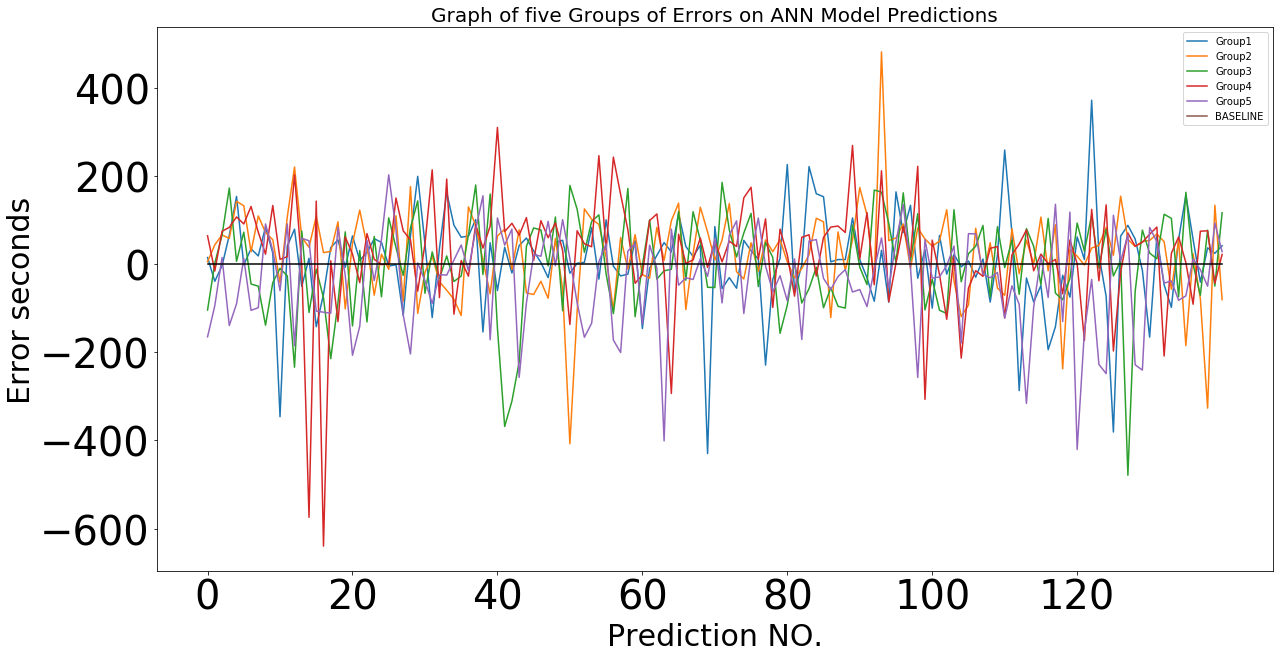

In [106]:
import numpy as np
newErrorArray = np.transpose(ErrorArray)
df = pd.DataFrame(data=newErrorArray,columns=['Group1','Group2','Group3', 'Group4','Group5'])
df['BASELINE'] = 0
import matplotlib.pyplot as plt
plt.figure()
df.plot(figsize=(20, 10),fontsize=40)
plt.gca().get_lines()[5].set_color("black")
plt.title('Graph of five Groups of Errors on ANN Model Predictions', fontsize=20)
plt.xlabel('Prediction NO.',fontsize=30)
plt.ylabel('Error seconds',fontsize=30)
#fig.suptitle('test title', fontsize=20)
#axis(side=1, at=c(0:23))
#start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, 1))
plt.xticks(np.arange(0, 140, 20))
plt.show()

<Figure size 432x288 with 0 Axes>

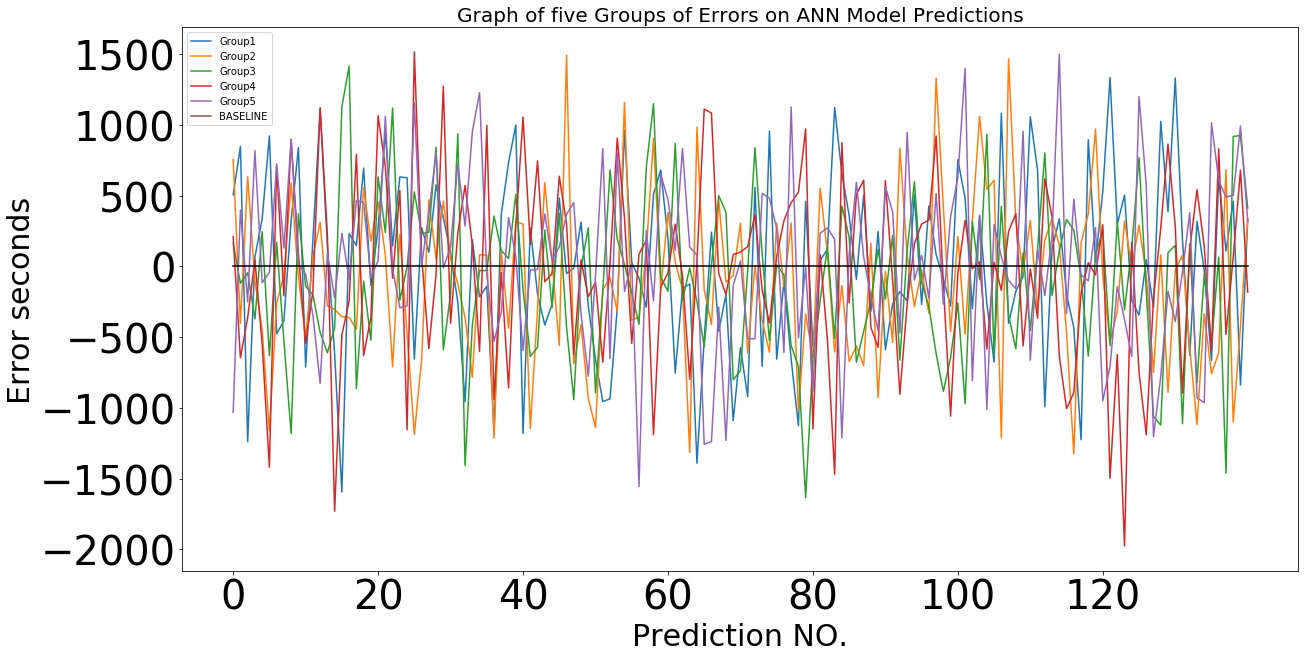

In [107]:
import numpy as np
newErrorArray = np.transpose(ErrorArray2)
df = pd.DataFrame(data=newErrorArray,columns=['Group1','Group2','Group3', 'Group4','Group5'])
df['BASELINE'] = 0
import matplotlib.pyplot as plt
plt.figure()
df.plot(figsize=(20, 10),fontsize=40)
plt.gca().get_lines()[5].set_color("black")
plt.title('Graph of five Groups of Errors on ANN Model Predictions', fontsize=20)
plt.xlabel('Prediction NO.',fontsize=30)
plt.ylabel('Error seconds',fontsize=30)
#fig.suptitle('test title', fontsize=20)
#axis(side=1, at=c(0:23))
#start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, 1))
plt.xticks(np.arange(0, 140, 20))
plt.show()

<Figure size 432x288 with 0 Axes>

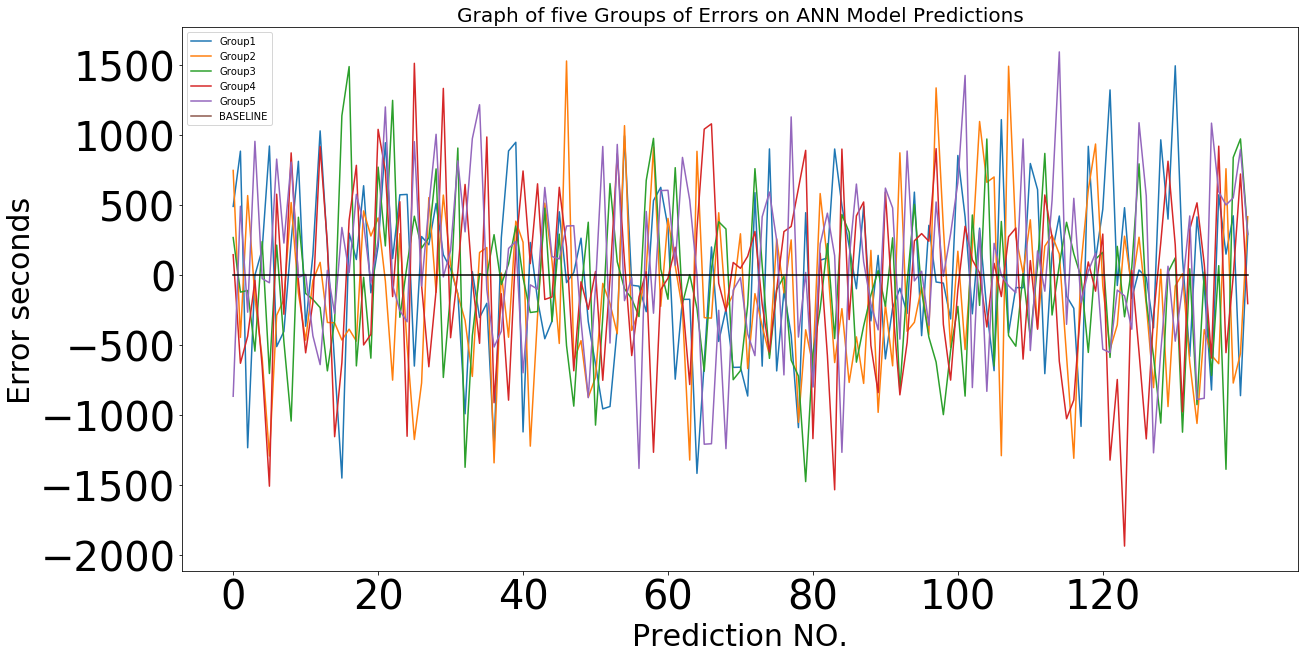

In [108]:
import numpy as np
newErrorArray = np.transpose(ErrorArray3)
df = pd.DataFrame(data=newErrorArray,columns=['Group1','Group2','Group3', 'Group4','Group5'])
df['BASELINE'] = 0
import matplotlib.pyplot as plt
plt.figure()
df.plot(figsize=(20, 10),fontsize=40)
plt.gca().get_lines()[5].set_color("black")
plt.title('Graph of five Groups of Errors on ANN Model Predictions', fontsize=20)
plt.xlabel('Prediction NO.',fontsize=30)
plt.ylabel('Error seconds',fontsize=30)
#fig.suptitle('test title', fontsize=20)
#axis(side=1, at=c(0:23))
#start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, 1))
plt.xticks(np.arange(0, 140, 20))
plt.show()

In [58]:
print("Index| prediction |Actual result| error")

#for prediction in predictions:
 #   print(prediction)
station_1 = 10
station_2 = 25
count = 0
for i in y_test.index:
    oneRow = predictions[count]
    prediction = oneRow[station_2] - oneRow[station_1]
    actual = y_test.loc[i][station_2] - y_test.loc[i][station_1]
    print(i, "\t", prediction,"\t", actual, "\t", prediction - actual) 
    #print(predictions[count])
    #print(y_test.loc[i])
    count += 1

Index| prediction |Actual result| error
7 	 1576.7700636998925 	 1708 	 -131.2299363001075
2 	 1444.0872672276746 	 1898 	 -453.9127327723254
12 	 1461.5388939069162 	 1604 	 -142.4611060930838
6 	 1611.0082444340587 	 1885 	 -273.9917555659413
3 	 1399.624308086266 	 1312 	 87.62430808626596


In [20]:
new_y_test = y_test.reset_index(drop=True)

In [21]:
index_array = list(range(len(predictions)))
newPredictions = np.array(predictions).tolist()

In [22]:
#predictions
from pandas import Series, DataFrame
ser = Series(newPredictions, index=index_array)
#print(ser)

In [23]:
prediction_df = DataFrame(newPredictions, index=index_array, columns = ['Predicted_Arr', 'Predicted_Dep'])

In [24]:
plot_df = new_y_test.join(prediction_df)

In [25]:
plot_df.sort_values("ActualTime_Arr", inplace=True)
plot_df = plot_df.drop(['ActualTime_Dep', 'Predicted_Dep'], axis=1)

In [26]:
plot_df = plot_df.reset_index(drop=True)

In [27]:
plot_df.head()

,ActualTime_Arr,Predicted_Arr
0,19129,19316.893764
1,19159,19316.464773
2,19176,19355.840375
3,19193,19355.408980
4,19196,19316.670475


<Figure size 432x288 with 0 Axes>

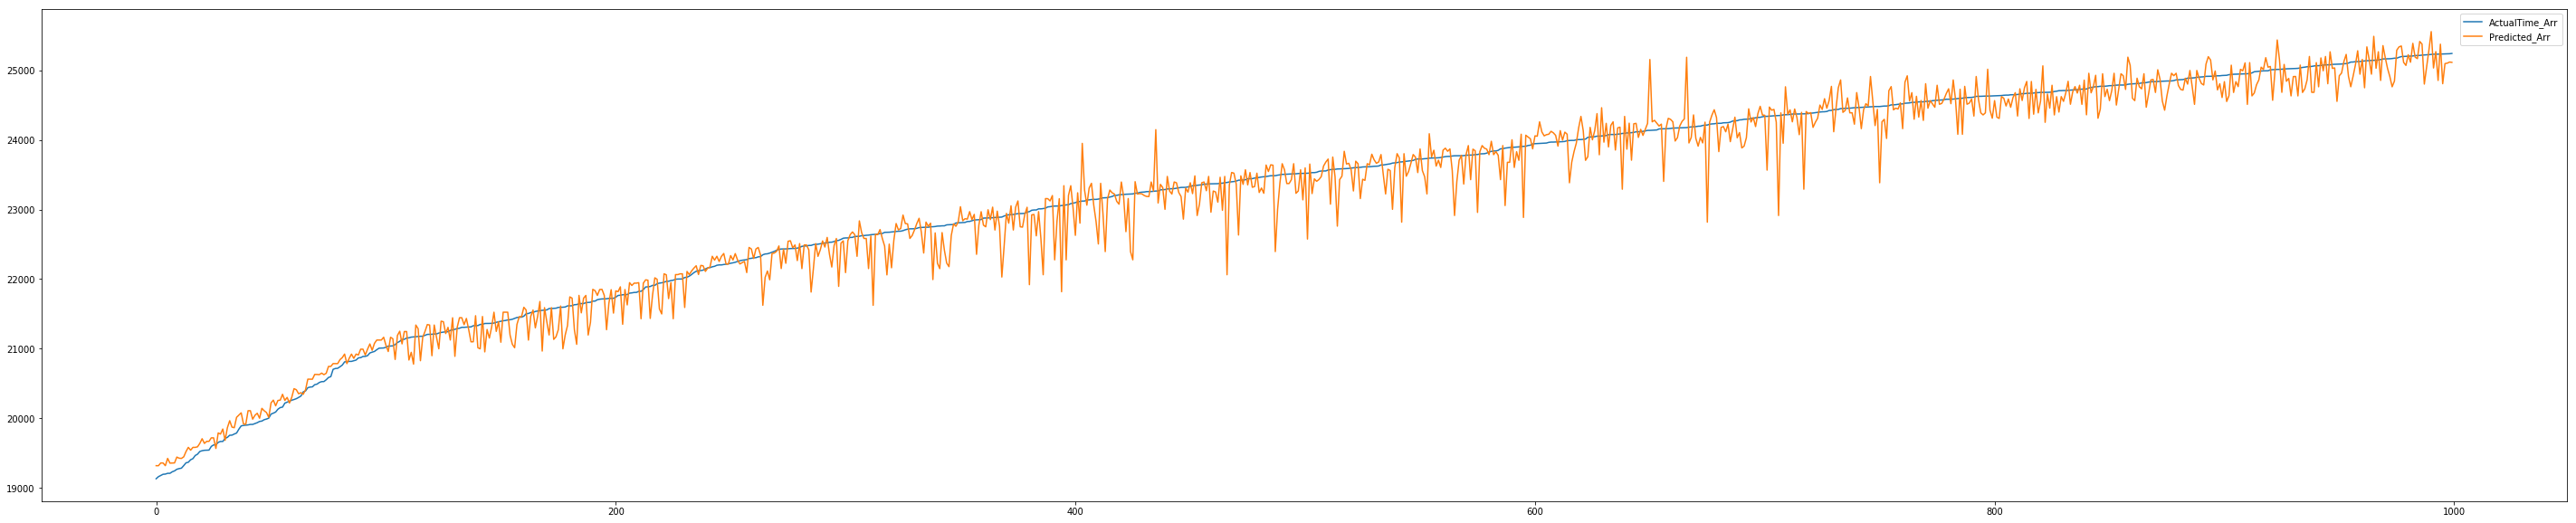

In [29]:
import matplotlib.pyplot as plt
plt.figure()
plot_df[:1000].plot(figsize=(50, 10))
plt.show()

In [109]:
# Storage Trained model in a file

import pickle
file = "39A_a_2017_06.clf"
output = open(file, 'wb')
pickle.dump(clf, output)
output.close()

In [216]:
# reload trained model fomr clf file
file = "39A_a_2017_06.clf"
pkl_file = open(file, 'rb')
new_clf = pickle.load(pkl_file)

In [217]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
def generalCrossValidationData(n_folds=10):
    '''
        This function is to separate DataFrame into k folds groups, each group include 90% train data and 10% test data,
        which is followed k-folds Cross-validation model.
        Input Value:
                - the number of folds, default is 10 folds
        Retrun Value:
                - ({k groups of train dataset}, {k group of test dataset})
    '''
    # Reading from a csv file, into a data frame
    # Drop 'customer' column because it is not continuous feature
    # Randomly shuffle the dataset
    # here you get 70% of the rows for train
    # this code tries to find that train = 70% and test = 30%
    #df = pd.read_csv("39A_73stations_JUN.csv")
    df = pd.read_csv("FINAL_39A_73stations_JUN.csv")

    # X Descriptive features (6 continous features)
    # y Target feature (happiness_class)
    a_columns = []
    b_columns = []
    # 74 is the total number of 39A bus stations
    #columns = []
    for i in range(1,74):
        a_columns.append('{}_P'.format(str(i).zfill(3)))
        b_columns.append('{}_A'.format(str(i).zfill(3)))
    all_columns = a_columns + b_columns
    new_df = pd.concat([df[all_columns]], axis=1)
 
    # we use k-folds cross validation model and we separate the data into 10 groups of train & test datasets
    # we use KFold method to separate the dataset based 10-folds Cross-validation rule
    from sklearn.cross_validation import KFold
    kf = KFold(len(new_df), n_folds=n_folds)
    train_index = {}
    test_index = {}
    count = 0
    for indexA, indexB in kf:
        train_index[count] = indexA
        test_index[count] = indexB
        count += 1

    trains = {}
    tests = {}
    for i in range(10):
        trains[i] = new_df.loc[train_index[i]]
        tests[i] = new_df.loc[test_index[i]]
    return (trains, tests)

In [218]:
trains, tests = generalCrossValidationData(10)

KeyError: "['001_P' '002_P' '003_P' '004_P' '005_P' '006_P' '007_P' '008_P' '009_P'\n '010_P' '011_P' '012_P' '013_P' '014_P' '015_P' '016_P' '017_P' '018_P'\n '019_P' '020_P' '021_P' '022_P' '023_P' '024_P' '025_P' '026_P' '027_P'\n '028_P' '029_P' '030_P' '031_P' '032_P' '033_P' '034_P' '035_P' '036_P'\n '037_P' '038_P' '039_P' '040_P' '041_P' '042_P' '043_P' '044_P' '045_P'\n '046_P' '047_P' '048_P' '049_P' '050_P' '051_P' '052_P' '053_P' '054_P'\n '055_P' '056_P' '057_P' '058_P' '059_P' '060_P' '061_P' '062_P' '063_P'\n '064_P' '065_P' '066_P' '067_P' '068_P' '069_P' '070_P' '071_P' '072_P'\n '073_P' '001_A' '002_A' '003_A' '004_A' '005_A' '006_A' '007_A' '008_A'\n '009_A' '010_A' '011_A' '012_A' '013_A' '014_A' '015_A' '016_A' '017_A'\n '018_A' '019_A' '020_A' '021_A' '022_A' '023_A' '024_A' '025_A' '026_A'\n '027_A' '028_A' '029_A' '030_A' '031_A' '032_A' '033_A' '034_A' '035_A'\n '036_A' '037_A' '038_A' '039_A' '040_A' '041_A' '042_A' '043_A' '044_A'\n '045_A' '046_A' '047_A' '048_A' '049_A' '050_A' '051_A' '052_A' '053_A'\n '054_A' '055_A' '056_A' '057_A' '058_A' '059_A' '060_A' '061_A' '062_A'\n '063_A' '064_A' '065_A' '066_A' '067_A' '068_A' '069_A' '070_A' '071_A'\n '072_A' '073_A'] not in index"

In [128]:
trains[0].head()

,a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9,a_10,...,b_64,b_65,b_66,b_67,b_68,b_69,b_70,b_71,b_72,b_73
65,43200,43330,43353,43397,43415,43452,43494,43543,43609,43670,...,49182,49273,49308,49353,49429,49497,49524,49577,49631,49703
66,43200,43330,43353,43397,43415,43452,43494,43543,43609,43670,...,48270,48351,48368,48410,48494,48581,48609,48670,48704,48727
67,55200,55366,55396,55459,55485,55538,55569,55606,55656,55717,...,60898,60957,60999,61039,61122,61209,61242,61310,61343,61369
68,55200,55366,55396,55459,55485,55538,55569,55606,55656,55717,...,60674,60765,60783,60820,60894,60969,61002,61062,61091,61110
69,68400,68520,68580,68634,68656,68700,68748,68804,68880,68940,...,72640,72728,72768,72830,72894,72977,72991,73065,73075,73075


In [215]:
# 10-fold crossing validation testing
scores = 0
vscores = 0
MSES = 0
a_columns = []
b_columns = []
for i in range(1,74):
        a_columns.append('{}_P'.format(str(i).zfill(3)))
        b_columns.append('{}_A'.format(str(i).zfill(3)))
#all_columns = a_columns + b_columns
# BP neural networking training
import numpy as np
#from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
# X Descriptive features (4 features)
# y Target feature (TripDuration)
scores = 0
for i in range(10):
    train = trains[i]
    test = tests[i]
    
    train_X = pd.concat([train[a_columns]], axis=1)
    train_y = train[b_columns]
    train_X = train_X.fillna(train_X.mean())
    train_y = train_y.fillna(train_y.mean())
    
    test_X = pd.concat([test[a_columns]])
    test_y = test[b_columns]
    test_X = test_X.fillna(test_X.mean())
    test_y = test_y.fillna(test_y.mean())
    
    # Instantiate model
    # 99% score
    #clf = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(10, 10, 10), random_state=1)
    # load from trained model new_clf
    clf = new_clf
    clf.fit(train_X,train_y)

    # Fit Model
    clf.fit(train_X, train_y)
    score = clf.score(test_X, test_y)
    scores += score
    print("test {} Score: {}".format(i+1,score))
    
    # Make predictions using the testing set
    diabetes_y_pred = clf.predict(test_X)
     # The mean squared error
    MSE = mean_squared_error(test_y, diabetes_y_pred)
    MSES += MSE
    print("\tMean squared error: %.2f"
      % MSE)
    
    # Explained variance score: 1 is perfect prediction
    vscore = r2_score(test_y, diabetes_y_pred)
    vscores += vscore
    print('\tVariance score: %.2f' % vscore)
print("Average of Score is: ", scores/10)
print("Average of MSE is: ", MSES/10)
print("Average of variance score is: ", vscores/10)

KeyError: "['001_P' '002_P' '003_P' '004_P' '005_P' '006_P' '007_P' '008_P' '009_P'\n '010_P' '011_P' '012_P' '013_P' '014_P' '015_P' '016_P' '017_P' '018_P'\n '019_P' '020_P' '021_P' '022_P' '023_P' '024_P' '025_P' '026_P' '027_P'\n '028_P' '029_P' '030_P' '031_P' '032_P' '033_P' '034_P' '035_P' '036_P'\n '037_P' '038_P' '039_P' '040_P' '041_P' '042_P' '043_P' '044_P' '045_P'\n '046_P' '047_P' '048_P' '049_P' '050_P' '051_P' '052_P' '053_P' '054_P'\n '055_P' '056_P' '057_P' '058_P' '059_P' '060_P' '061_P' '062_P' '063_P'\n '064_P' '065_P' '066_P' '067_P' '068_P' '069_P' '070_P' '071_P' '072_P'\n '073_P'] not in index"